# **Setting up libraries and plot parameters**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
from google.colab import files

In [117]:
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from xgboost import XGBRegressor

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [6]:
# Set Matplotlib defaults
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

# **Loading the data**

In [7]:
folder_path='/content/gdrive/My Drive/Data Science journey/Kaggle competitions/Store Sales - Time Series Forecasting/store-sales-time-series-forecasting/'
file_path_train = folder_path + 'train.csv'
file_path_test = folder_path + 'test.csv'
file_path_holidays = folder_path + 'holidays_events.csv'

print(file_path_train)
print(file_path_test)
print(file_path_holidays)

/content/gdrive/My Drive/Data Science journey/Kaggle competitions/Store Sales - Time Series Forecasting/store-sales-time-series-forecasting/train.csv
/content/gdrive/My Drive/Data Science journey/Kaggle competitions/Store Sales - Time Series Forecasting/store-sales-time-series-forecasting/test.csv
/content/gdrive/My Drive/Data Science journey/Kaggle competitions/Store Sales - Time Series Forecasting/store-sales-time-series-forecasting/holidays_events.csv


In [8]:
# connect to Google Drive
drive.mount('/content/gdrive')
open(file_path_train).read()
open(file_path_test).read()
open(file_path_holidays).read()

Mounted at /content/gdrive


'date,type,locale,locale_name,description,transferred\n2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False\n2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False\n2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False\n2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False\n2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False\n2012-05-12,Holiday,Local,Puyo,Cantonizacion del Puyo,False\n2012-06-23,Holiday,Local,Guaranda,Cantonizacion de Guaranda,False\n2012-06-25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False\n2012-06-25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False\n2012-06-25,Holiday,Local,Machala,Fundacion de Machala,False\n2012-07-03,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False\n2012-07-03,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False\n2012-07-23,Holiday,Local,Cayambe,Cantonizacion de Cayambe,False\n2012-08-05,Holiday,Local,Esmeraldas,Fundacion de Esmeraldas,False\n2012-08-10,Holid

In [9]:
df_train = pd.read_csv(
    file_path_train,
    parse_dates=['date'],
    )

df_test = pd.read_csv(
    file_path_test,
    parse_dates=['date'],
    )

In [10]:
df_holidays = pd.read_csv(
    file_path_holidays,
    parse_dates = ['date']
)

# **Exploratory Data Analysis**

In [11]:
df_train.head(5)

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

In [12]:
df_train.tail()

id       date  store_nbr                      family     sales  \
3000883  3000883 2017-08-15          9                     POULTRY   438.133   
3000884  3000884 2017-08-15          9              PREPARED FOODS   154.553   
3000885  3000885 2017-08-15          9                     PRODUCE  2419.729   
3000886  3000886 2017-08-15          9  SCHOOL AND OFFICE SUPPLIES   121.000   
3000887  3000887 2017-08-15          9                     SEAFOOD    16.000   

         onpromotion  
3000883            0  
3000884            1  
3000885          148  
3000886            8  
3000887            0

The dataset comprises a series of sales for different categories from 2013 to 2017.

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


In [14]:
df_train['store_nbr'].value_counts()

store_nbr
1     55572
10    55572
11    55572
12    55572
13    55572
14    55572
15    55572
16    55572
17    55572
18    55572
19    55572
2     55572
20    55572
21    55572
22    55572
23    55572
24    55572
25    55572
26    55572
27    55572
28    55572
29    55572
3     55572
30    55572
31    55572
32    55572
33    55572
34    55572
35    55572
36    55572
37    55572
38    55572
39    55572
4     55572
40    55572
41    55572
42    55572
43    55572
44    55572
45    55572
46    55572
47    55572
48    55572
49    55572
5     55572
50    55572
51    55572
52    55572
53    55572
54    55572
6     55572
7     55572
8     55572
9     55572
Name: count, dtype: int64

In [15]:
stores = df_train['store_nbr'].unique()
print("The number of stores is ", len(stores))

The number of stores is  54


In [16]:
df_train['family'].value_counts()

family
AUTOMOTIVE                    90936
BABY CARE                     90936
BEAUTY                        90936
BEVERAGES                     90936
BOOKS                         90936
BREAD/BAKERY                  90936
CELEBRATION                   90936
CLEANING                      90936
DAIRY                         90936
DELI                          90936
EGGS                          90936
FROZEN FOODS                  90936
GROCERY I                     90936
GROCERY II                    90936
HARDWARE                      90936
HOME AND KITCHEN I            90936
HOME AND KITCHEN II           90936
HOME APPLIANCES               90936
HOME CARE                     90936
LADIESWEAR                    90936
LAWN AND GARDEN               90936
LINGERIE                      90936
LIQUOR,WINE,BEER              90936
MAGAZINES                     90936
MEATS                         90936
PERSONAL CARE                 90936
PET SUPPLIES                  90936
PLAYERS AND ELECTRONICS       90936
POULTRY                       90936
PREPARED FOODS                90936
PRODUCE                       90936
SCHOOL AND OFFICE SUPPLIES    90936
SEAFOOD                       90936
Name: count, dtype: int64

In [17]:
families = df_train['family'].unique()
print('The categories are: ', families)
print('\nThe number of categories are: ', len(families))

The categories are:  ['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']

The number of categories are:  33



**Observations**
> We found that there are 54 stores and 55572 entries for each store.
There are 33 families (or categories) with 90936 entries for each family.




# **Time series modeling with Linear Regression**

## re-indexing and grouping


> Let's create a copy of the `df_train` dataframe and structure it with its date, store number and family as indexes.



In [18]:
store_sales = df_train.copy()
store_sales = store_sales.set_index('date').to_period('D')                # converts the DatetimeIndex to a PeriodIndex with daily frequency

# create a MultiIndex
store_sales = store_sales.set_index(['store_nbr','family'], append=True)  # append=True keeps the current index (e.g., date) and adds new levels on top.

# show new df
store_sales

id     sales  \
date       store_nbr family                                          
2013-01-01 1         AUTOMOTIVE                        0     0.000   
                     BABY CARE                         1     0.000   
                     BEAUTY                            2     0.000   
                     BEVERAGES                         3     0.000   
                     BOOKS                             4     0.000   
...                                                  ...       ...   
2017-08-15 9         POULTRY                     3000883   438.133   
                     PREPARED FOODS              3000884   154.553   
                     PRODUCE                     3000885  2419.729   
                     SCHOOL AND OFFICE SUPPLIES  3000886   121.000   
                     SEAFOOD                     3000887    16.000   

                                                 onpromotion  
date       store_nbr family                                   
2013-01-01 1         AUTOMOTIVE                            0  
                     BABY CARE                             0  
                     BEAUTY                                0  
                     BEVERAGES                             0  
                     BOOKS                                 0  
...                                                      ...  
2017-08-15 9         POULTRY                               0  
                     PREPARED FOODS                        1  
                     PRODUCE                             148  
                     SCHOOL AND OFFICE SUPPLIES            8  
                     SEAFOOD                               0  

[3000888 rows x 3 columns]



> compute the average sales grouped by day and store it as a series



In [19]:
average_sales = store_sales.groupby('date').mean()['sales']
average_sales

date
2013-01-01      1.409438
2013-01-02    278.390807
2013-01-03    202.840197
2013-01-04    198.911154
2013-01-05    267.873244
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Freq: D, Name: sales, Length: 1684, dtype: float64

## Time-step feature



> We add a time-step feature on the `average_sales` dataframe and fit a Linear Regression Model. We then plot the fitted values over time.



In [20]:
# convert average_sales series into a dataframe
df_average = average_sales.to_frame()

In [21]:
# create time-step feature using a time dummy
timestep = np.arange(len(df_average.index))
df_average['timestep'] = timestep            # add feature column to new df

df_average

sales  timestep
date                            
2013-01-01    1.409438         0
2013-01-02  278.390807         1
2013-01-03  202.840197         2
2013-01-04  198.911154         3
2013-01-05  267.873244         4
...                ...       ...
2017-08-11  463.733851      1679
2017-08-12  444.798280      1680
2017-08-13  485.768618      1681
2017-08-14  427.004717      1682
2017-08-15  427.980884      1683

[1684 rows x 2 columns]

In [22]:
# split features from target
X = df_average.loc[:,['timestep']]      # note different shape for features
y = df_average.loc[:, 'sales']

model = LinearRegression()
model.fit(X, y)

# store the fitted values as a time series with the same time index as the training data
predictions = model.predict(X)
y_pred = pd.Series(predictions, index = X.index)

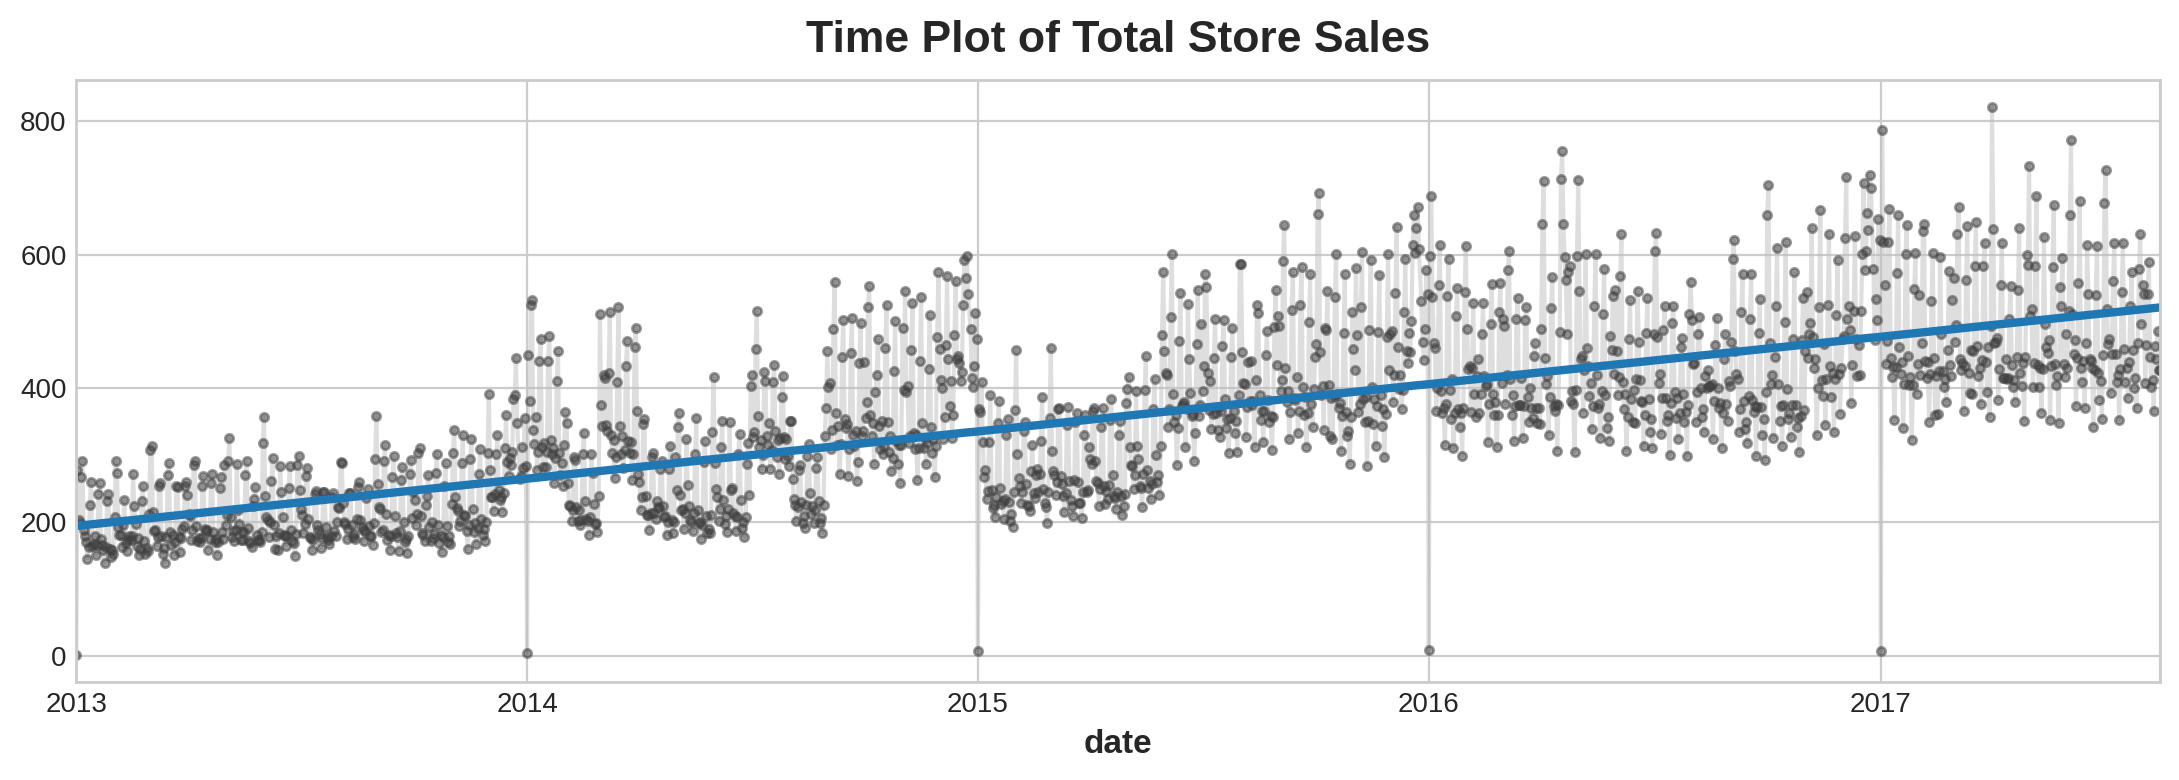

In [23]:
ax = y.plot(**plot_params, alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Total Store Sales');

## Lag feature



> We create a lag feature by shifting the 'sales' target values



In [24]:
# create lag feature by shifting the 'sales' values by 1 day
lag_1 = df_average['sales'].shift(1)

df_average['lag_1'] = lag_1
df_average

sales  timestep       lag_1
date                                        
2013-01-01    1.409438         0         NaN
2013-01-02  278.390807         1    1.409438
2013-01-03  202.840197         2  278.390807
2013-01-04  198.911154         3  202.840197
2013-01-05  267.873244         4  198.911154
...                ...       ...         ...
2017-08-11  463.733851      1679  365.536988
2017-08-12  444.798280      1680  463.733851
2017-08-13  485.768618      1681  444.798280
2017-08-14  427.004717      1682  485.768618
2017-08-15  427.980884      1683  427.004717

[1684 rows x 3 columns]



> When creating lag features, we need to decide what to do with the missing values produced. Filling them in is one option, maybe with 0.0 or "backfilling" with the first known value. Instead, we'll just drop the missing values, making sure to also drop values in the target from corresponding dates.



In [25]:
X = df_average.loc[:,['lag_1']]   # lag feature
y = df_average.loc[:,'sales']     # target

X.dropna(inplace = True)         # drop NaN
y, X = y.align(X, join='inner')  # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)

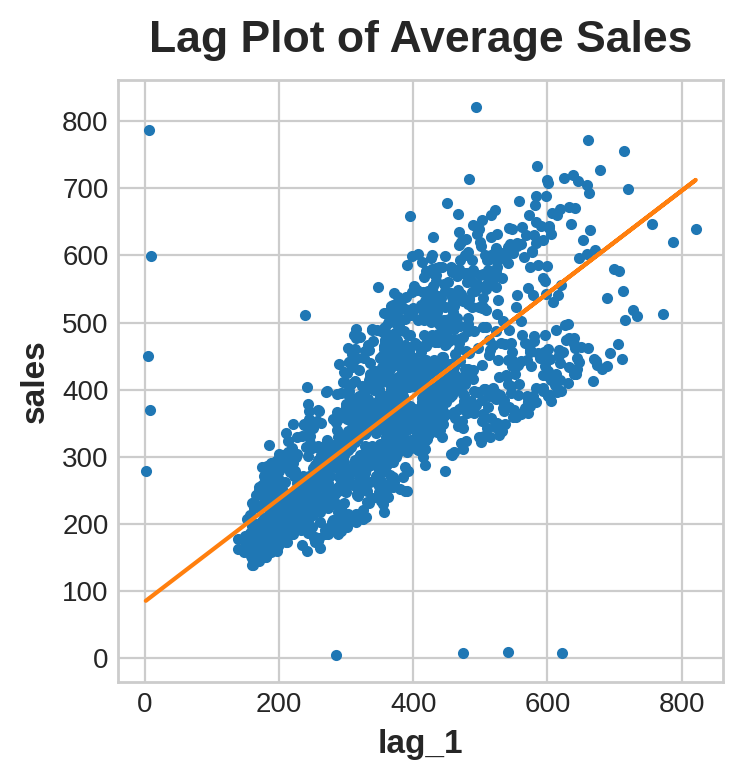

In [26]:
fig, ax = plt.subplots()

ax.plot(X, y, '.')        # dots
ax.plot(X, y_pred)

ax.set(aspect='equal', ylabel='sales', xlabel='lag_1', title='Lag Plot of Average Sales');



> Generally, lag features let you model serial dependence. You can see from the lag plot that sales on one day (`sales`) are correlated with sales from the previous day (`Lag_1`). When you see a relationship like this, you know a lag feature will be useful.



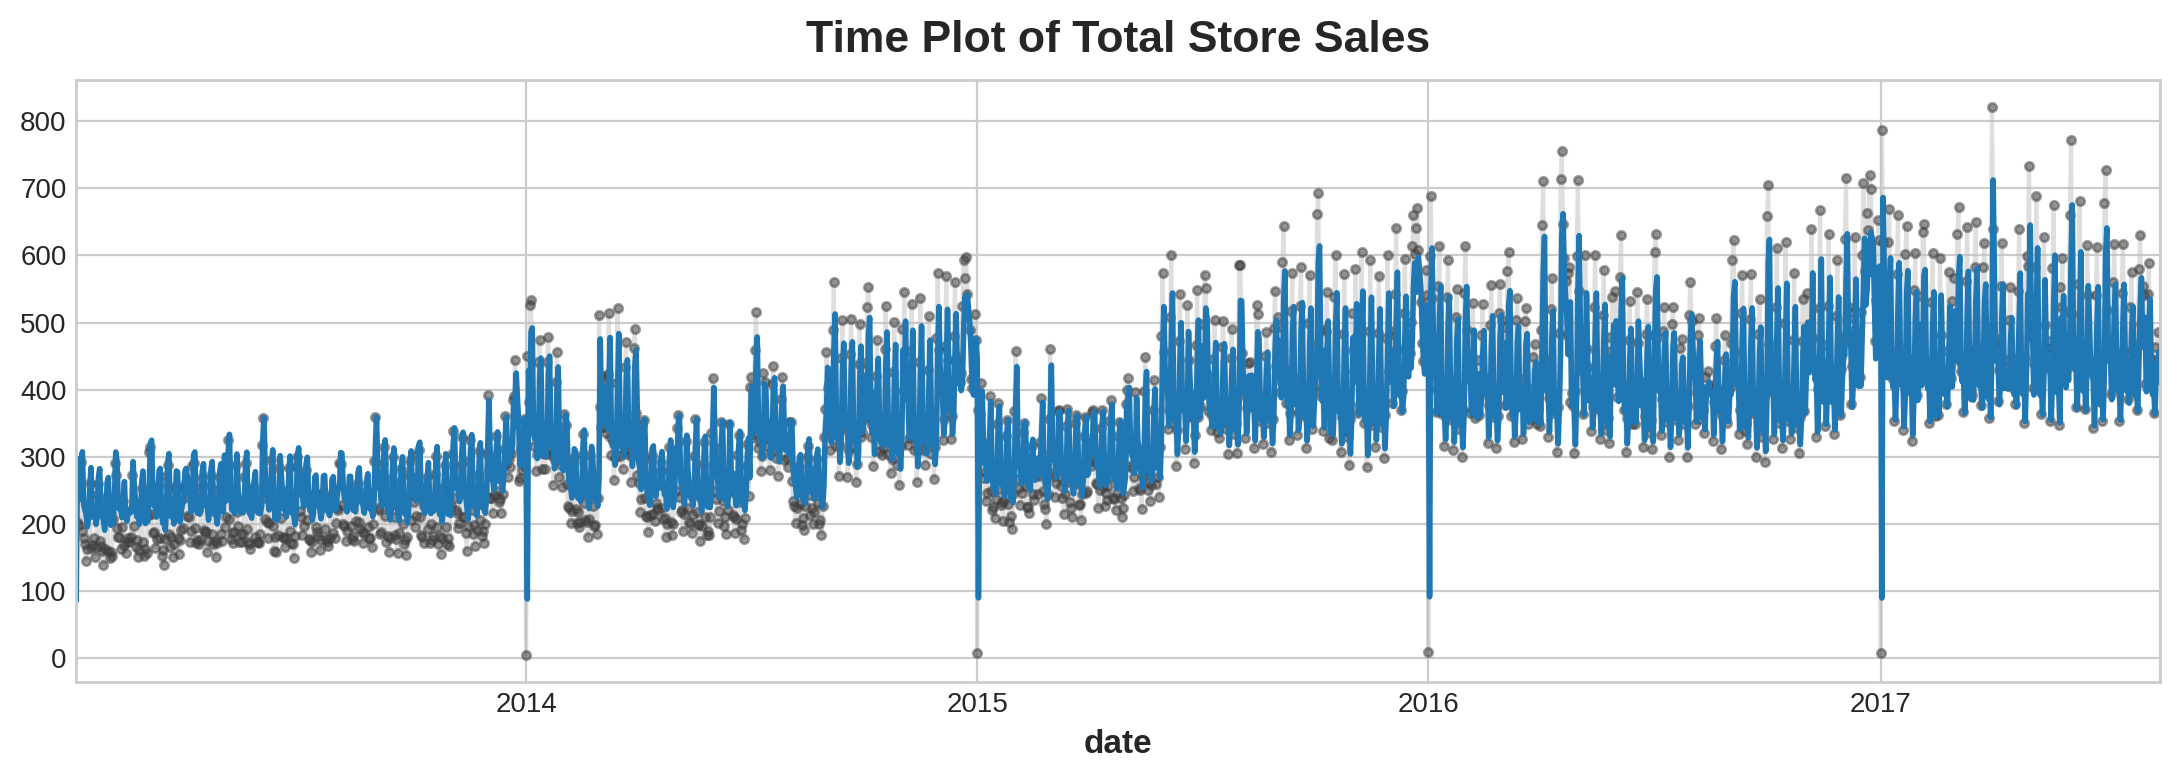

In [27]:
ax = y.plot(**plot_params, alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=2)
ax.set_title('Time Plot of Total Store Sales');

## Moving average plots (Trend)



> To see what kind of trend a time series might have, we can use a moving average plot. To compute a moving average of a time series, we compute the average of the values within a sliding window of some defined width.
The idea is to smooth out any short-term fluctuations in the series so that only long-term changes remain.






> Let's make a **moving average plot** to see what kind of **trend** this series has. Since this series has daily observations, let's choose a window of 365 days to smooth over any short-term changes within the year.



In [28]:
trend = average_sales.rolling(        # note I am using the original pd.Series
    window = 365,                     # 365-day window
    center = True,                    # puts the average at the center of the window
    min_periods = 183,                # choose about half the window size
    ).mean()                          # compute the mean (could also do median, std, min, max, ...)

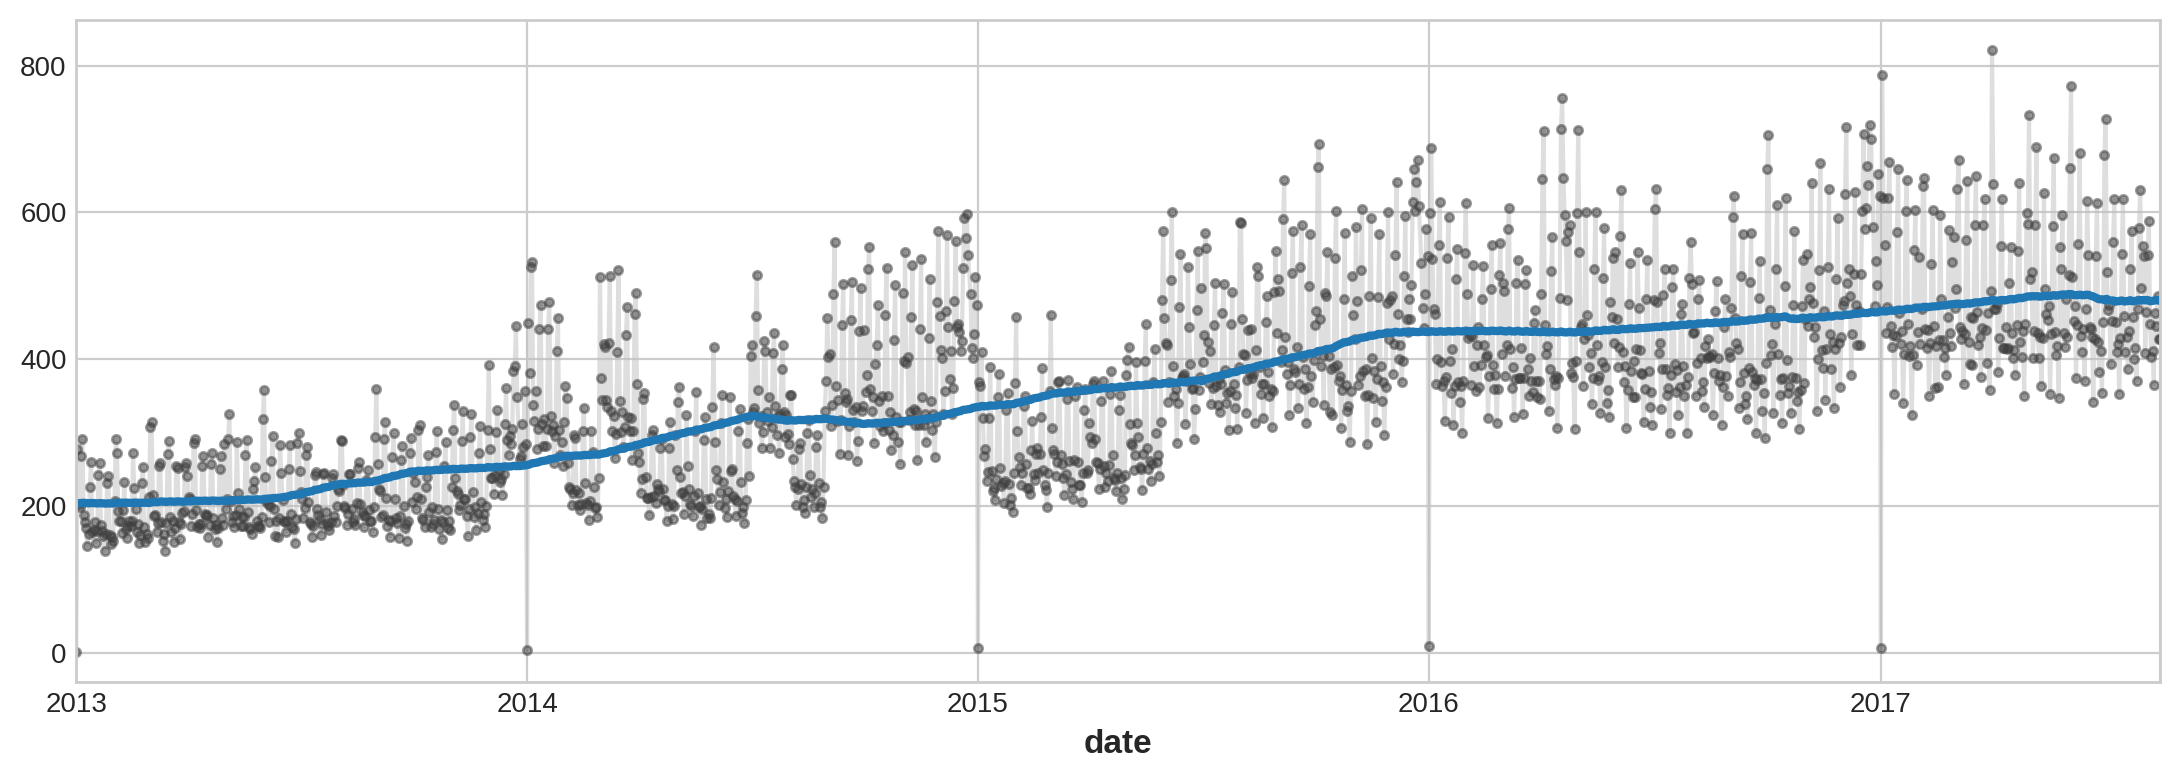

In [29]:
ax = average_sales.plot(**plot_params, alpha=0.5)
ax = trend.plot(ax=ax, linewidth=3)



> the trend of average sales appears to be about cubic (order 3).



## Create a trend feature



> We’ll use `DeterministicProcess` to create a feature set for a cubic trend model. Also create features for a 90-day forecast. To make a forecast, we apply our model to “out of sample” features.



In [30]:
dp = DeterministicProcess(
    index = average_sales.index,    # dates from the training data
    order = 3,                      # the time dummy (cubic trend)
    drop = True,                    # drop terms if necessary to avoid collinearity
)

X = dp.in_sample()            # `in_sample` creates features for the dates given in the `index` argument
y = average_sales.copy()      # target

X_fore = dp.out_of_sample(steps = 90)   # create features for the 90-day forecast

In [31]:
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)
y_fore = pd.Series(model.predict(X_fore), index = X_fore.index)

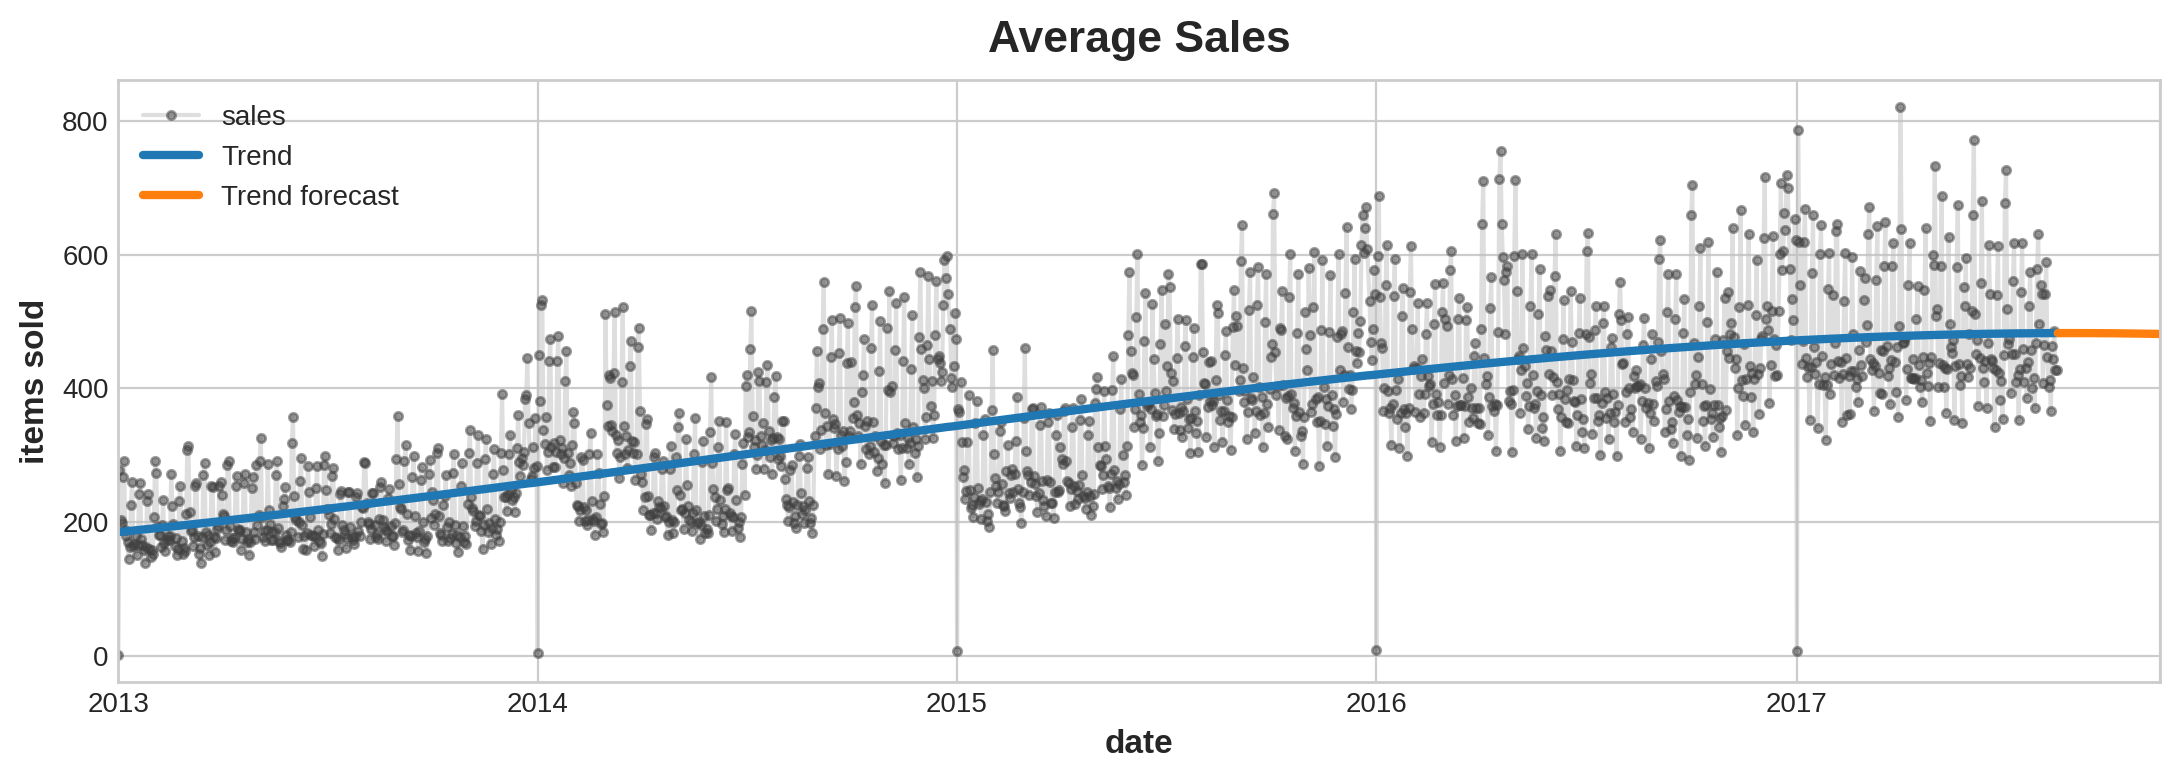

In [32]:
ax = y.plot(**plot_params, alpha = 0.5, title="Average Sales", ylabel="items sold")
ax = y_pred.plot(linewidth=3, label ='Trend')
ax = y_fore.plot(linewidth=3, label ='Trend forecast')
ax.legend()



> The trend discovered by our `LinearRegression` model is almost identical to the moving average plot, which suggests that a cubic trend was the right decision in this case.



## Seasonality



> We say that a time series exhibits seasonality whenever there is a regular, periodic change in the mean of the series.


> Seasonality is often driven by the cycles of the natural world over days and years or by conventions of social behavior surrounding dates and times.







> We will learn two kinds of features that model seasonality. The first kind, **indicators**, is best for a season with few observations, like a weekly season of daily observations. The second kind, **Fourier features**, is best for a season with many observations, like an annual season of daily observations.


> We will include in our analysis the data from the `holidays.csv` file, which includes information about holidays and important events, with metadata




In [33]:
holidays = df_holidays.copy()
holidays = holidays.set_index('date').to_period('D')
holidays.head()

type    locale locale_name                    description  \
date                                                                       
2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

            transferred  
date                     
2012-03-02        False  
2012-04-01        False  
2012-04-12        False  
2012-04-14        False  
2012-04-21        False


> Define functions for plotting the seasonal plot and periodograms



In [34]:
# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax

In [35]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax

In [36]:
# Let's use a new dataframe comprising average sales from 2017 only
average_sales_2017 = store_sales.groupby('date').mean().squeeze().loc['2017']['sales']
average_sales_2017

date
2017-01-01      6.780304
2017-01-02    786.928379
2017-01-03    619.740224
2017-01-04    555.608004
2017-01-05    436.375395
                 ...    
2017-08-11    463.733851
2017-08-12    444.798280
2017-08-13    485.768618
2017-08-14    427.004717
2017-08-15    427.980884
Freq: D, Name: sales, Length: 227, dtype: float64

In [37]:
average_2017 = average_sales_2017.to_frame()  # copy

# extract week number and day of week from the date index
average_2017['week'] = average_2017.index.week
average_2017['day'] = average_2017.index.dayofweek
average_2017

sales  week  day
date                             
2017-01-01    6.780304    52    6
2017-01-02  786.928379     1    0
2017-01-03  619.740224     1    1
2017-01-04  555.608004     1    2
2017-01-05  436.375395     1    3
...                ...   ...  ...
2017-08-11  463.733851    32    4
2017-08-12  444.798280    32    5
2017-08-13  485.768618    32    6
2017-08-14  427.004717    33    0
2017-08-15  427.980884    33    1

[227 rows x 3 columns]

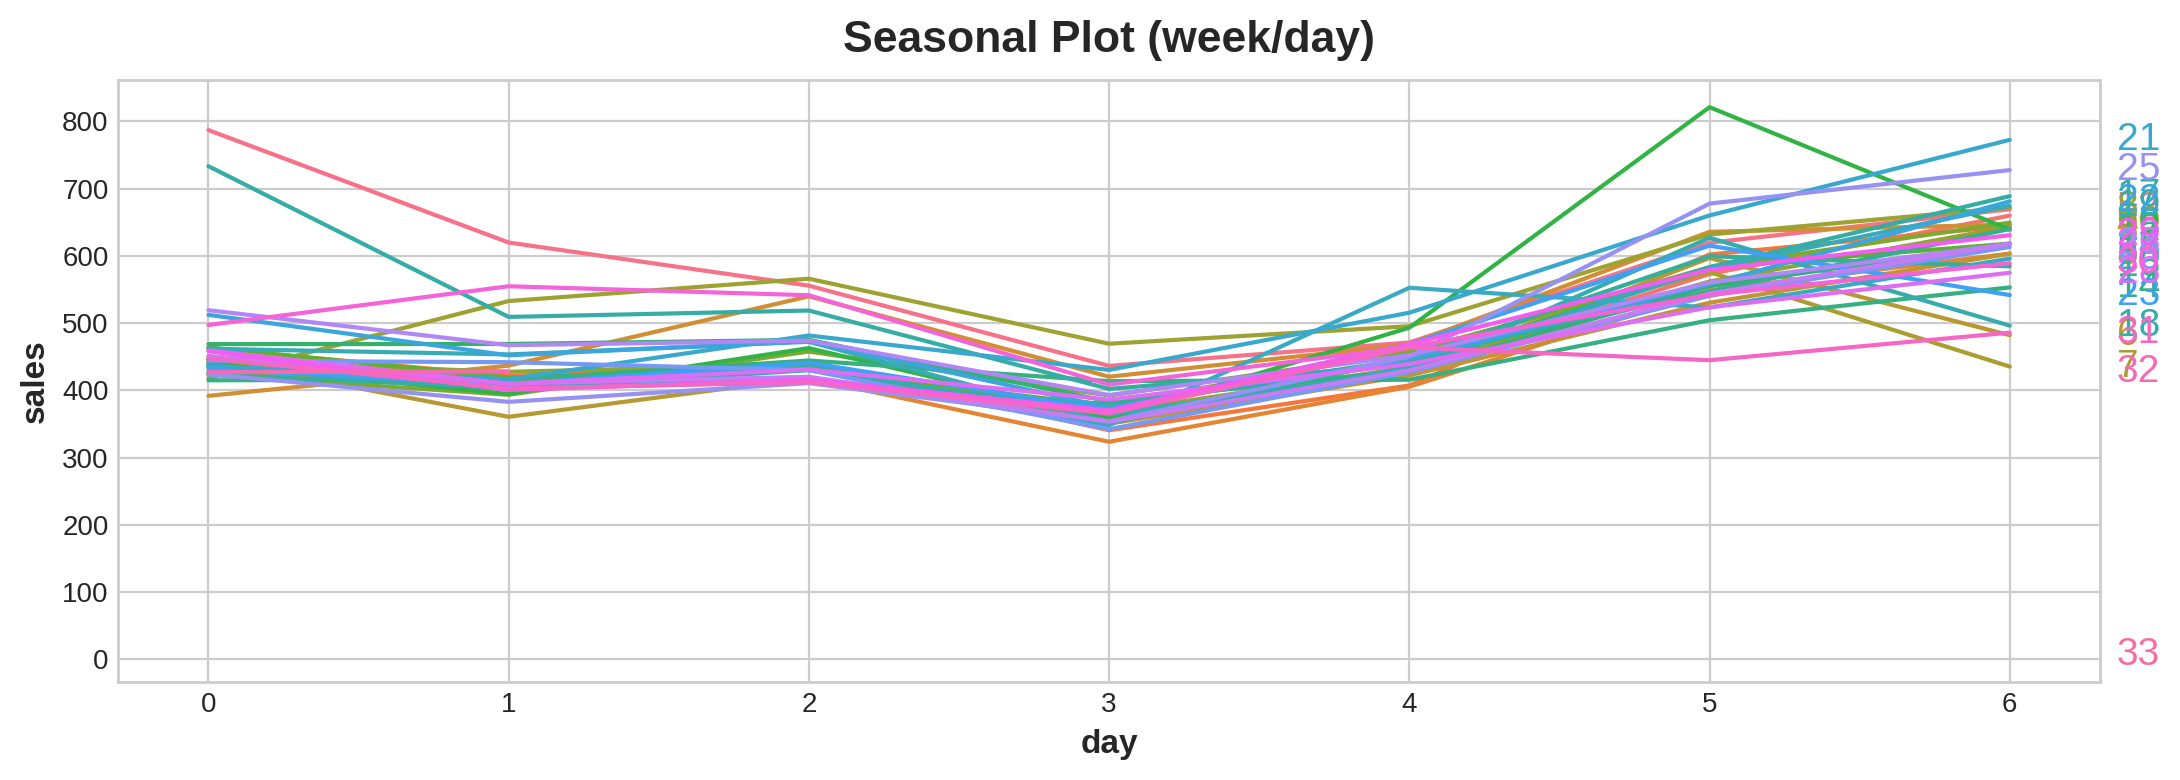

In [38]:
# plot seasonal plot using sales data from 2017 (representative year)
seasonal_plot(X=average_2017, y='sales', period='week', freq='day');

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

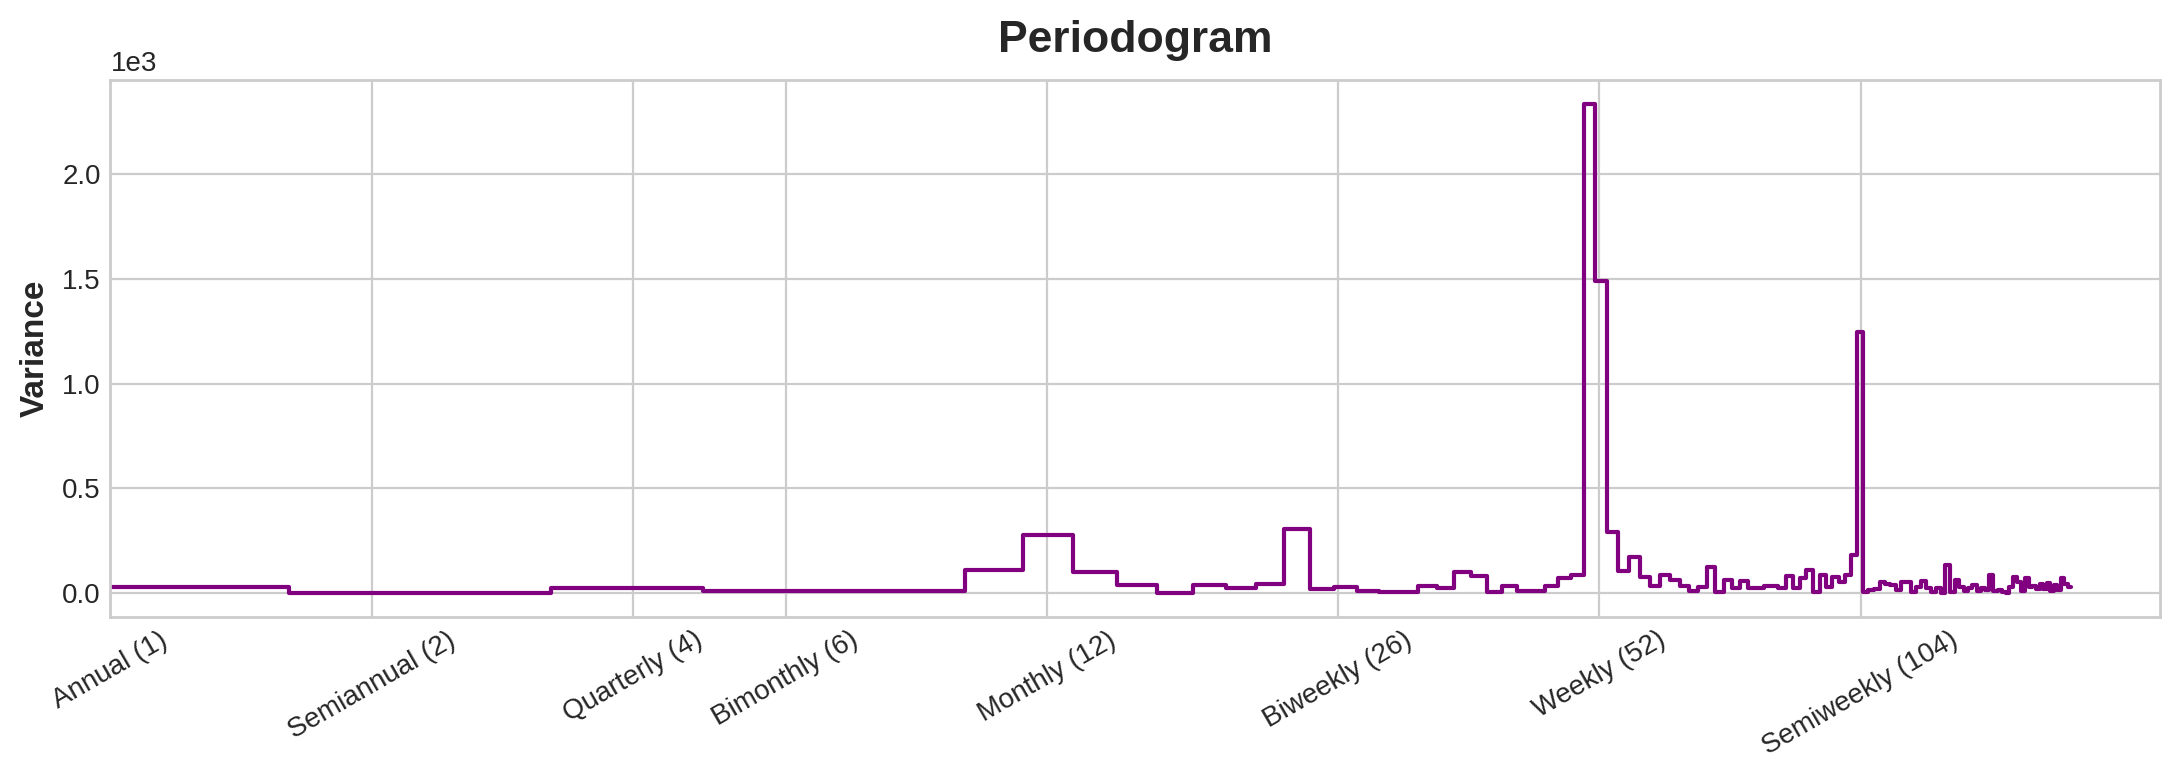

In [39]:
# plot periodogram using the training data from 2017 without the new 'week' and 'day' features
plot_periodogram (average_sales_2017)



> From left to right, the periodogram drops off after Monthly, twelve times a year. That was why we’ll choose 12 Fourier pairs to model the annual season. The Weekly frequency we ignore since it’s better modeled with indicators.


> Both the seasonal plot and the periodogram suggest a strong weekly seasonality. From the periodogram, it appears there may be some monthly and biweekly components as well. (In fact, the notes to the Store Sales dataset say wages in the public sector are paid out biweekly, on the 15th and last day of the month — a possible origin for these seasons).





## Create seasonal features

In [40]:
fourier = CalendarFourier(freq='M', order=4)      # 4 sin/cos pairs for "M"onthly seasonality

dp_seasonal = DeterministicProcess(
    index = average_sales_2017.index,
    constant = True,
    order = 1,                      # trend (order 1 means linear)
    seasonal = True,                # weekly seasonality (indicators)
    additional_terms = [fourier],   # annual seasonality (fourier)
    drop = True,
)

X = dp_seasonal.in_sample()       # features
y = average_sales_2017.copy()     # target

In [41]:
# seasonal features
X.head()

const  trend  s(2,7)  s(3,7)  s(4,7)  s(5,7)  s(6,7)  s(7,7)  \
date                                                                       
2017-01-01    1.0    1.0     0.0     0.0     0.0     0.0     0.0     0.0   
2017-01-02    1.0    2.0     1.0     0.0     0.0     0.0     0.0     0.0   
2017-01-03    1.0    3.0     0.0     1.0     0.0     0.0     0.0     0.0   
2017-01-04    1.0    4.0     0.0     0.0     1.0     0.0     0.0     0.0   
2017-01-05    1.0    5.0     0.0     0.0     0.0     1.0     0.0     0.0   

            sin(1,freq=ME)  cos(1,freq=ME)  sin(2,freq=ME)  cos(2,freq=ME)  \
date                                                                         
2017-01-01        0.000000        1.000000        0.000000        1.000000   
2017-01-02        0.201299        0.979530        0.394356        0.918958   
2017-01-03        0.394356        0.918958        0.724793        0.688967   
2017-01-04        0.571268        0.820763        0.937752        0.347305   
2017-01-05        0.724793        0.688967        0.998717       -0.050649   

            sin(3,freq=ME)  cos(3,freq=ME)  sin(4,freq=ME)  cos(4,freq=ME)  
date                                                                        
2017-01-01        0.000000        1.000000        0.000000        1.000000  
2017-01-02        0.571268        0.820763        0.724793        0.688967  
2017-01-03        0.937752        0.347305        0.998717       -0.050649  
2017-01-04        0.968077       -0.250653        0.651372       -0.758758  
2017-01-05        0.651372       -0.758758       -0.101168       -0.994869

In [42]:
model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index = X.index)

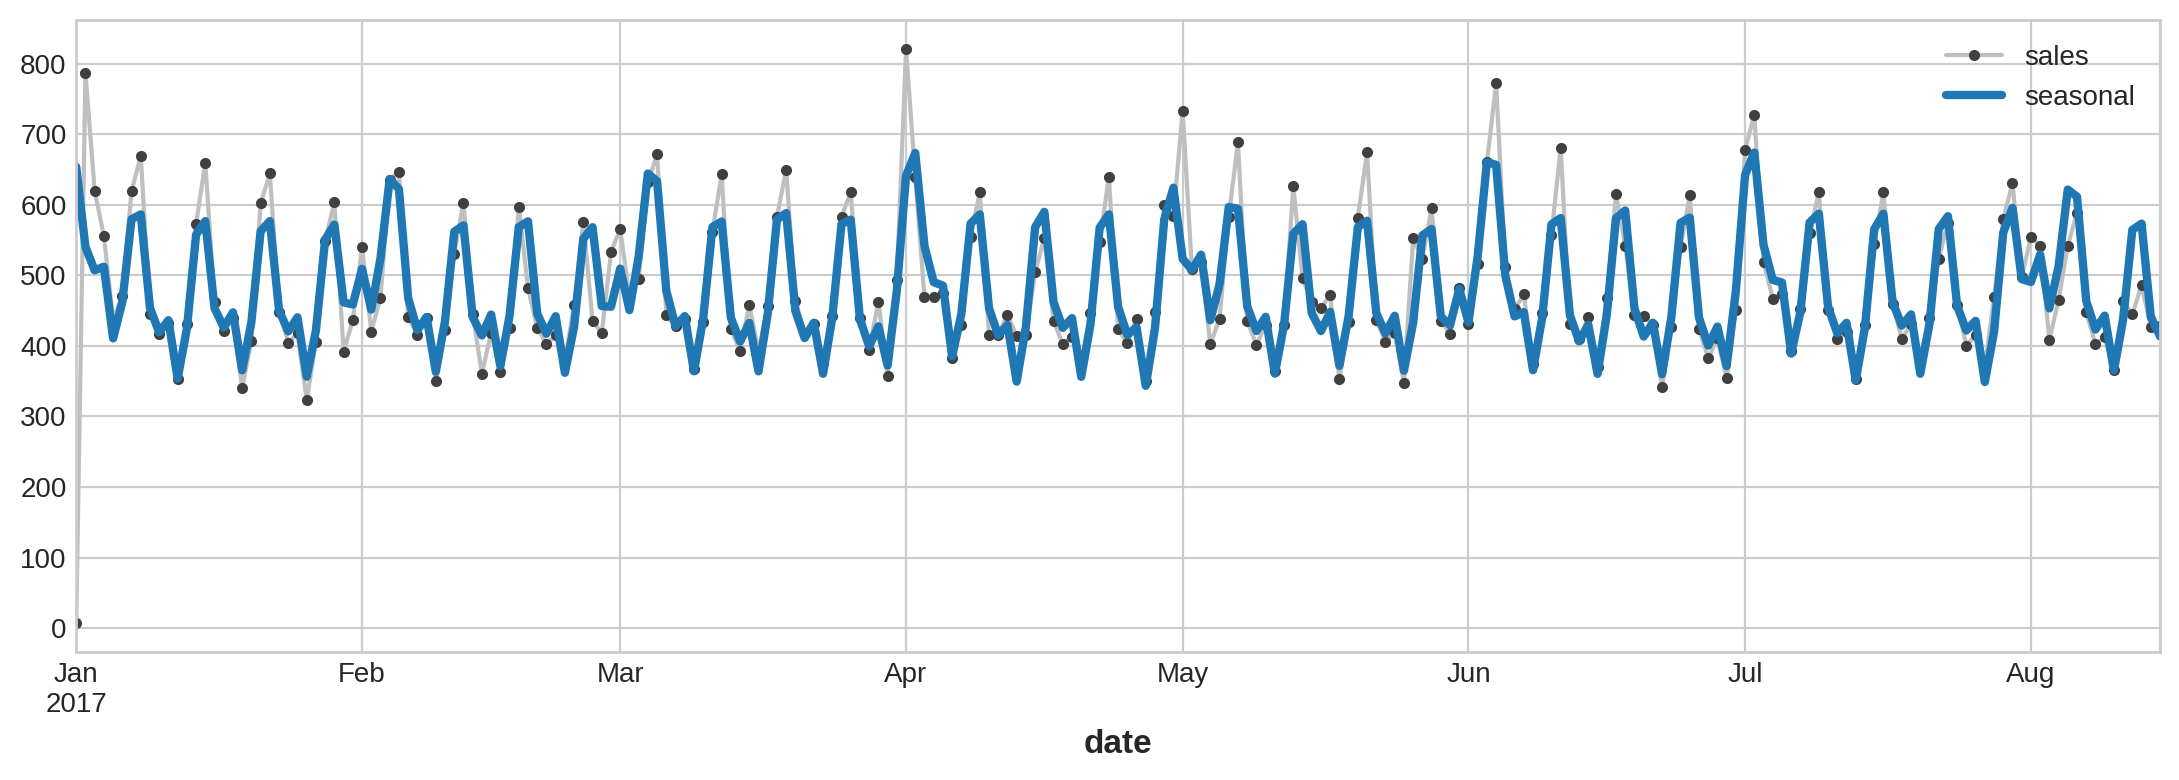

In [43]:
ax = y.plot(**plot_params, label='sales')
ax = y_pred.plot(linewidth=3, label = 'seasonal')
ax.legend()



> a 90-day forecast to see how our model extrapolates beyond the training data



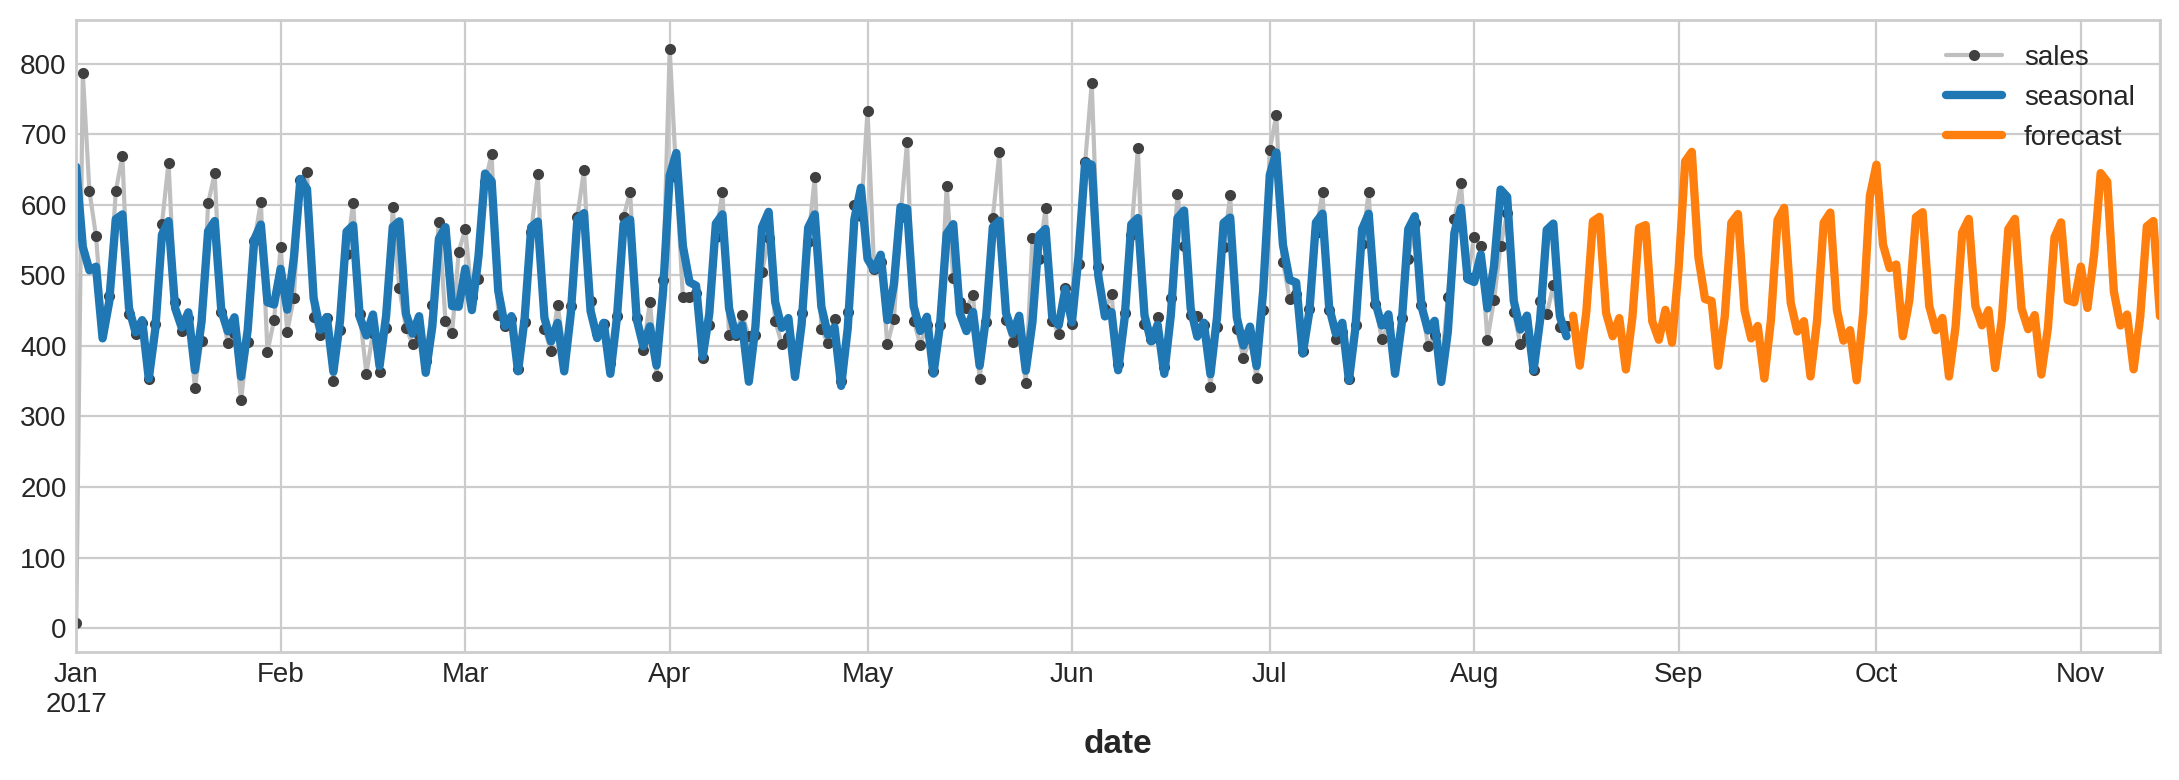

In [44]:
X_fore = dp_seasonal.out_of_sample(steps = 90) # 90-day forecast
y_fore = pd.Series(model.predict(X_fore), index = X_fore.index)

ax = y.plot(**plot_params, label='sales')
ax = y_pred.plot(linewidth=3, label = 'seasonal')
ax = y_fore.plot(linewidth=3, label = 'forecast')
ax.legend()

## Deseasonalizing or Detrending



> Removing from a series its trend or seasons is called detrending or deseasonalizing the series.



In [45]:
y_deseason = y - y_pred

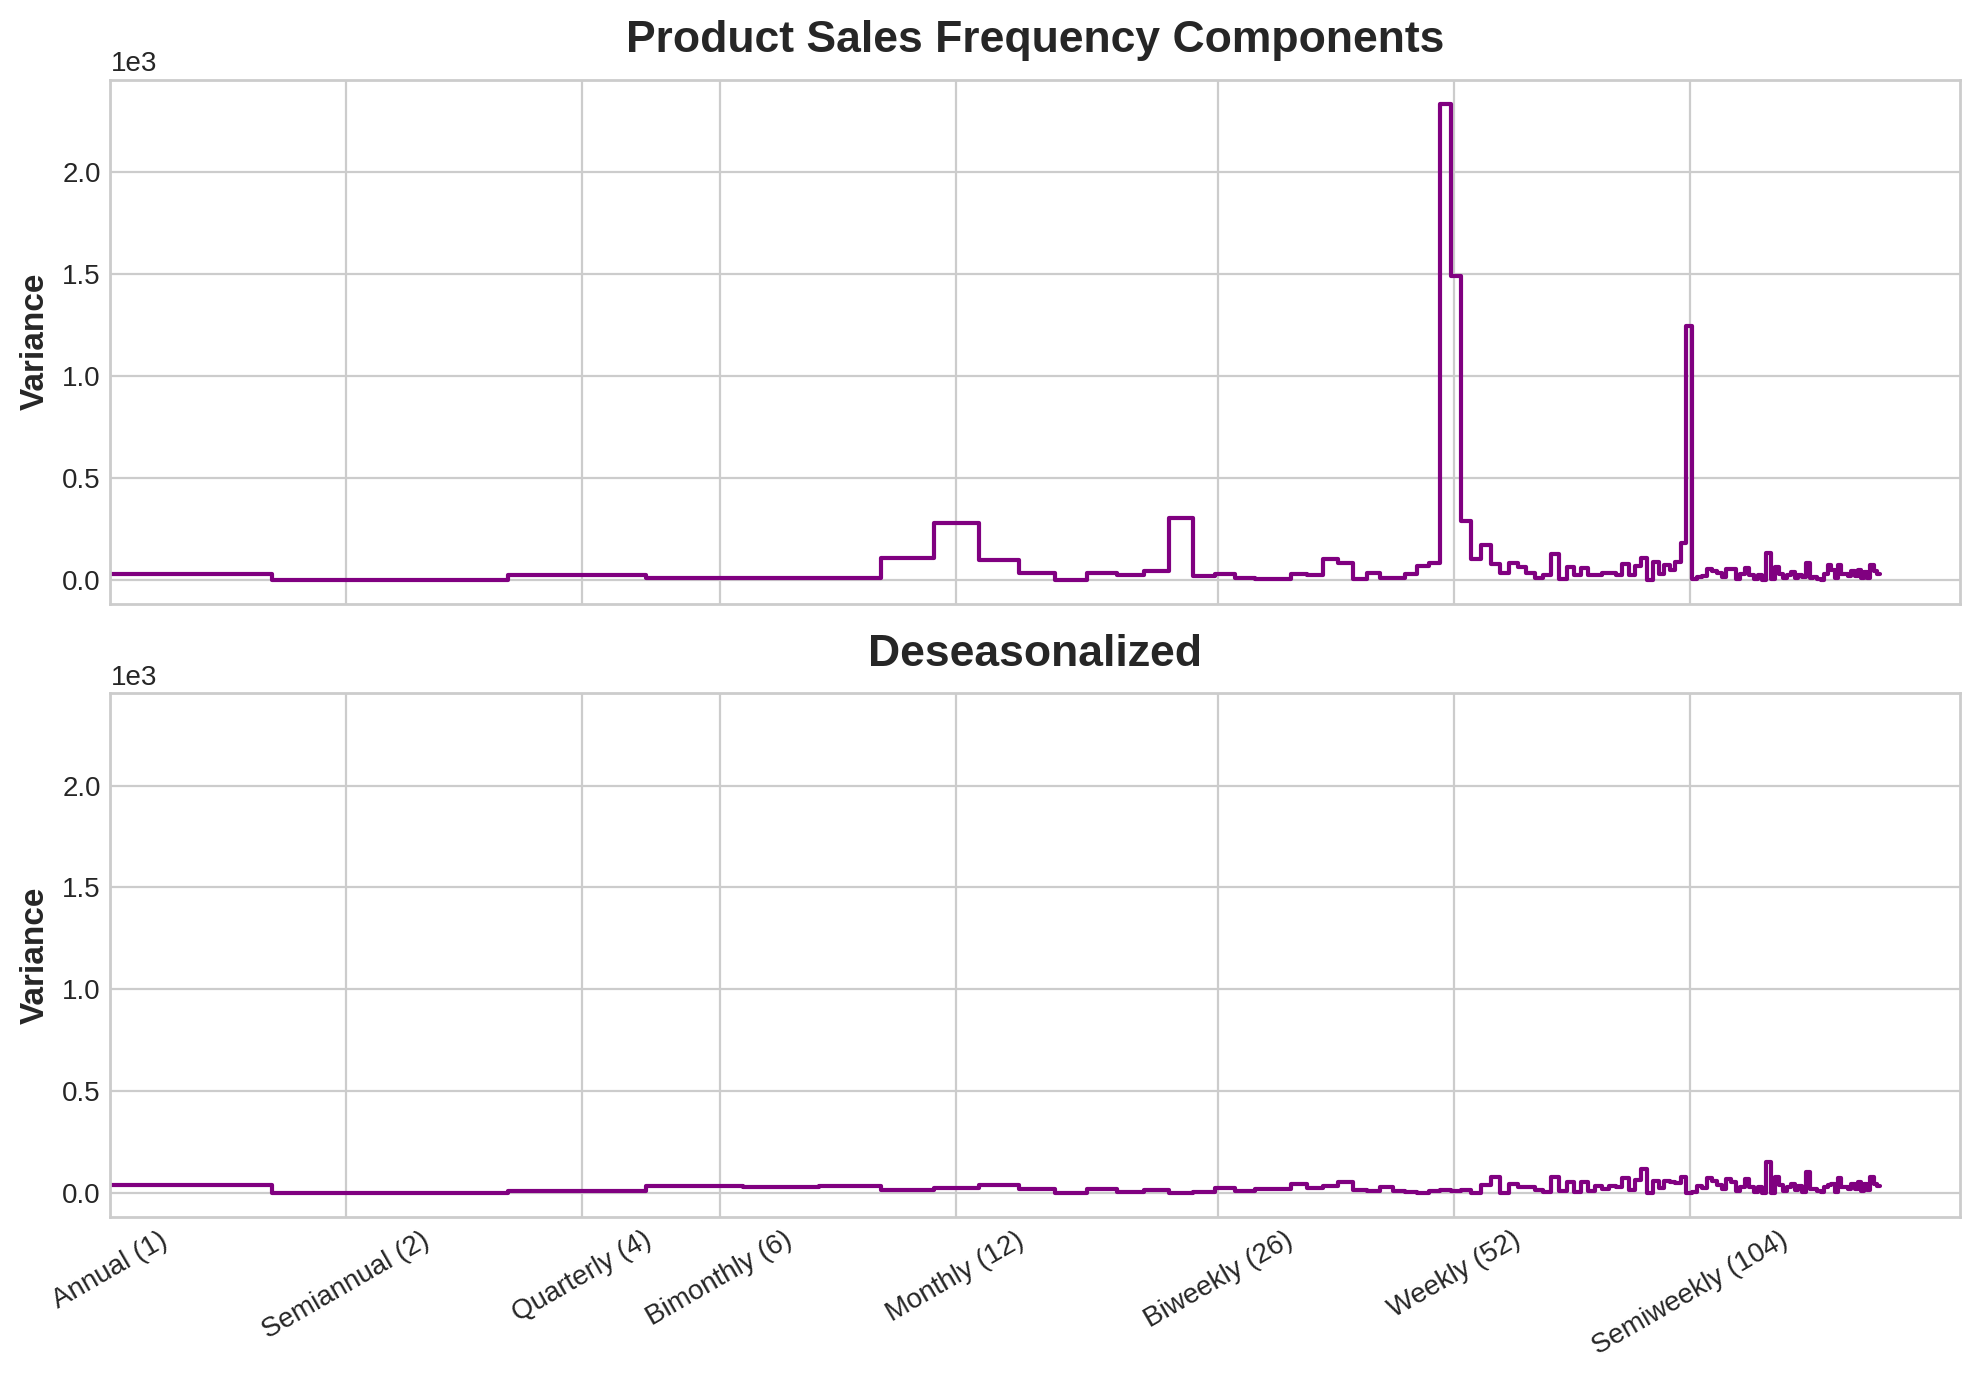

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(10, 7))

ax1 = plot_periodogram(y, ax=ax1)
ax1.set_title("Product Sales Frequency Components")

ax2 = plot_periodogram(y_deseason, ax=ax2);
ax2.set_title("Deseasonalized");

## Holidays features



> Let's create a dataframe with data about Regional and National Ecuadorian Holidays from 2017.



In [47]:
df_holidays # competition file

date        type    locale locale_name  \
0   2012-03-02     Holiday     Local       Manta   
1   2012-04-01     Holiday  Regional    Cotopaxi   
2   2012-04-12     Holiday     Local      Cuenca   
3   2012-04-14     Holiday     Local    Libertad   
4   2012-04-21     Holiday     Local    Riobamba   
..         ...         ...       ...         ...   
345 2017-12-22  Additional  National     Ecuador   
346 2017-12-23  Additional  National     Ecuador   
347 2017-12-24  Additional  National     Ecuador   
348 2017-12-25     Holiday  National     Ecuador   
349 2017-12-26  Additional  National     Ecuador   

                       description  transferred  
0               Fundacion de Manta        False  
1    Provincializacion de Cotopaxi        False  
2              Fundacion de Cuenca        False  
3        Cantonizacion de Libertad        False  
4        Cantonizacion de Riobamba        False  
..                             ...          ...  
345                      Navidad-3        False  
346                      Navidad-2        False  
347                      Navidad-1        False  
348                        Navidad        False  
349                      Navidad+1        False  

[350 rows x 6 columns]

In [48]:
holidays = df_holidays.set_index('date').to_period('D')
ecuador_holidays = holidays[((holidays['locale'] == 'Regional')|(holidays['locale'] == 'National'))&(holidays['locale_name']=='Ecuador')].loc['2017']
ecuador_holidays = ecuador_holidays [ecuador_holidays.index < '2017-08-15']
ecuador_holidays = ecuador_holidays['description']
ecuador_holidays

date
2017-01-01                        Primer dia del ano
2017-01-02               Traslado Primer dia del ano
2017-02-27                                  Carnaval
2017-02-28                                  Carnaval
2017-04-14                             Viernes Santo
2017-05-01                           Dia del Trabajo
2017-05-13                         Dia de la Madre-1
2017-05-14                           Dia de la Madre
2017-05-24                      Batalla de Pichincha
2017-05-26             Traslado Batalla de Pichincha
2017-08-10             Primer Grito de Independencia
2017-08-11    Traslado Primer Grito de Independencia
Freq: D, Name: description, dtype: object

Text(0.5, 1.0, 'Regional and National Holiday in Ecuador')

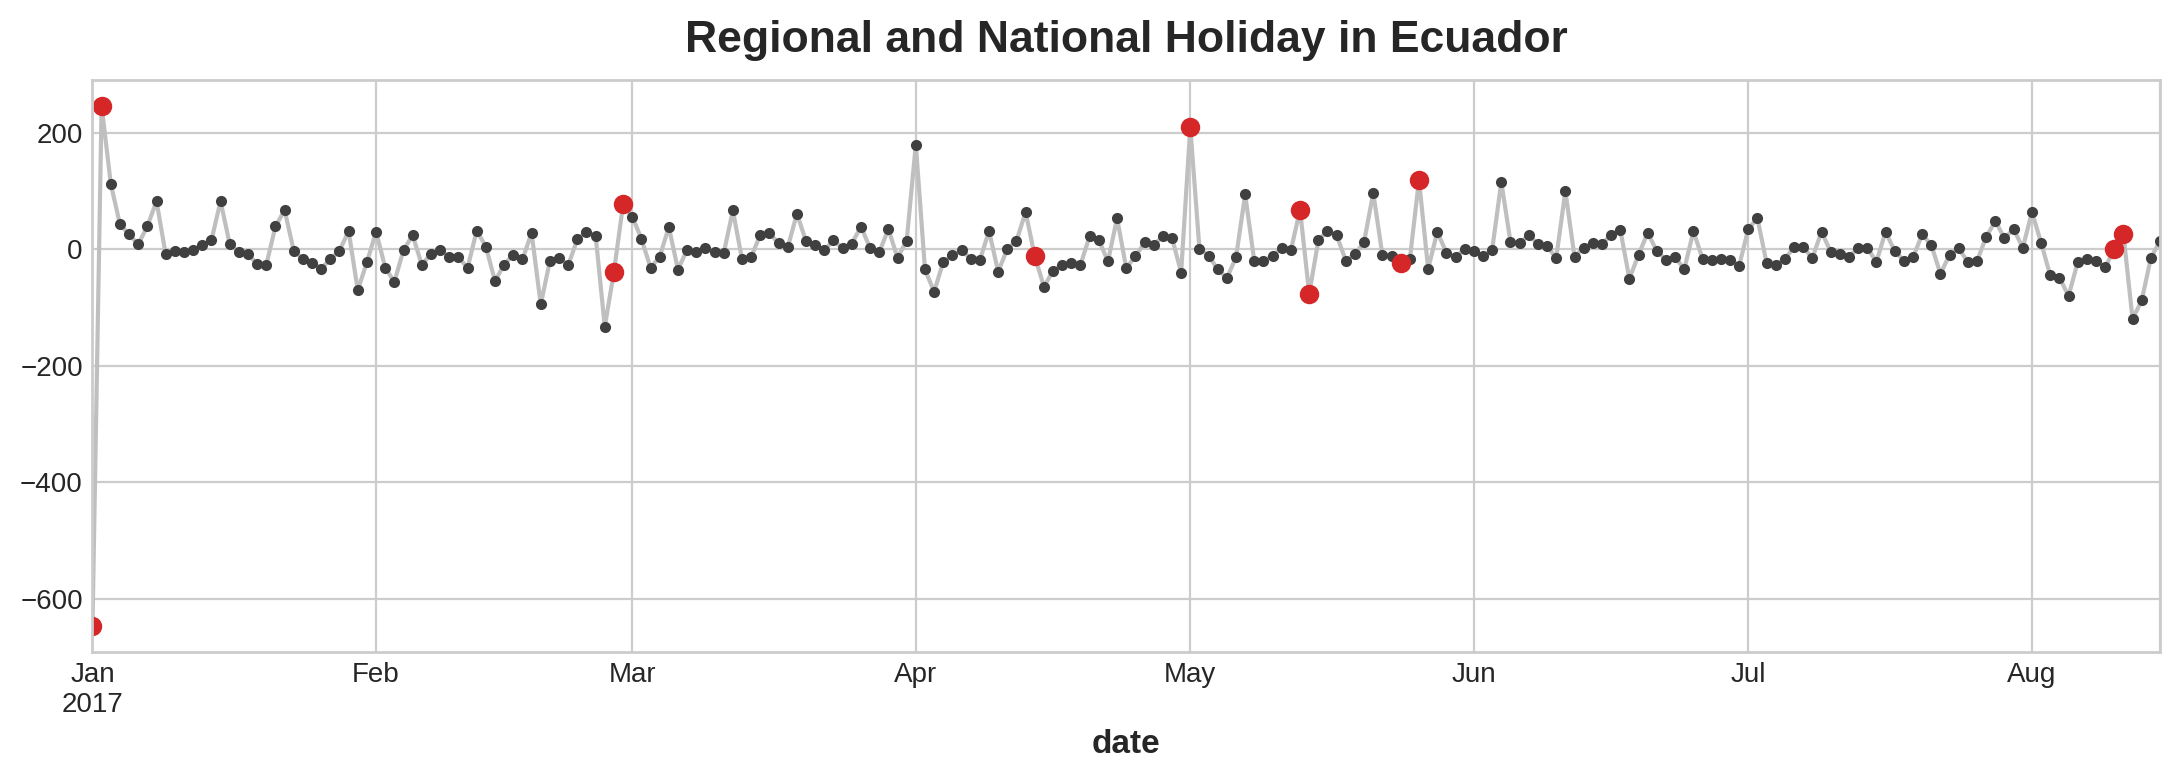

In [49]:
ax = y_deseason.plot(**plot_params)
plt.plot_date (ecuador_holidays.index, y_deseason[ecuador_holidays.index], color='C3')
ax.set_title('Regional and National Holiday in Ecuador')



> From a plot of the deseasonalized Average Sales, it appears these holidays could have some predictive power.



## Create Holiday features



> We use the OneHotEncoder method to create holiday features



In [50]:
ecuador_holidays_df = ecuador_holidays.to_frame()
ecuador_holidays_df

description
date                                              
2017-01-01                      Primer dia del ano
2017-01-02             Traslado Primer dia del ano
2017-02-27                                Carnaval
2017-02-28                                Carnaval
2017-04-14                           Viernes Santo
2017-05-01                         Dia del Trabajo
2017-05-13                       Dia de la Madre-1
2017-05-14                         Dia de la Madre
2017-05-24                    Batalla de Pichincha
2017-05-26           Traslado Batalla de Pichincha
2017-08-10           Primer Grito de Independencia
2017-08-11  Traslado Primer Grito de Independencia

In [51]:
ohe = OneHotEncoder(sparse_output=False)

X_holidays = pd.DataFrame(
    ohe.fit_transform(ecuador_holidays_df),
    index = ecuador_holidays_df.index,
    columns = ecuador_holidays_df.description.unique()
)

In [52]:
X_holidays

Primer dia del ano  Traslado Primer dia del ano  Carnaval  \
date                                                                    
2017-01-01                 0.0                          0.0       0.0   
2017-01-02                 0.0                          0.0       0.0   
2017-02-27                 0.0                          1.0       0.0   
2017-02-28                 0.0                          1.0       0.0   
2017-04-14                 0.0                          0.0       0.0   
2017-05-01                 0.0                          0.0       0.0   
2017-05-13                 0.0                          0.0       0.0   
2017-05-14                 0.0                          0.0       1.0   
2017-05-24                 1.0                          0.0       0.0   
2017-05-26                 0.0                          0.0       0.0   
2017-08-10                 0.0                          0.0       0.0   
2017-08-11                 0.0                          0.0       0.0   

            Viernes Santo  Dia del Trabajo  Dia de la Madre-1  \
date                                                            
2017-01-01            0.0              0.0                0.0   
2017-01-02            0.0              0.0                0.0   
2017-02-27            0.0              0.0                0.0   
2017-02-28            0.0              0.0                0.0   
2017-04-14            0.0              0.0                0.0   
2017-05-01            0.0              1.0                0.0   
2017-05-13            1.0              0.0                0.0   
2017-05-14            0.0              0.0                0.0   
2017-05-24            0.0              0.0                0.0   
2017-05-26            0.0              0.0                0.0   
2017-08-10            0.0              0.0                1.0   
2017-08-11            0.0              0.0                0.0   

            Dia de la Madre  Batalla de Pichincha  \
date                                                
2017-01-01              1.0                   0.0   
2017-01-02              0.0                   0.0   
2017-02-27              0.0                   0.0   
2017-02-28              0.0                   0.0   
2017-04-14              0.0                   0.0   
2017-05-01              0.0                   0.0   
2017-05-13              0.0                   0.0   
2017-05-14              0.0                   0.0   
2017-05-24              0.0                   0.0   
2017-05-26              0.0                   1.0   
2017-08-10              0.0                   0.0   
2017-08-11              0.0                   0.0   

            Traslado Batalla de Pichincha  Primer Grito de Independencia  \
date                                                                       
2017-01-01                            0.0                            0.0   
2017-01-02                            0.0                            1.0   
2017-02-27                            0.0                            0.0   
2017-02-28                            0.0                            0.0   
2017-04-14                            0.0                            0.0   
2017-05-01                            0.0                            0.0   
2017-05-13                            0.0                            0.0   
2017-05-14                            0.0                            0.0   
2017-05-24                            0.0                            0.0   
2017-05-26                            0.0                            0.0   
2017-08-10                            0.0                            0.0   
2017-08-11                            1.0                            0.0   

            Traslado Primer Grito de Independencia  
date                                                
2017-01-01                                     0.0  
2017-01-02                                     0.0  
2017-02-27                                     0.0  
2017-



> and then join them to the training data (with seasonal features) we already had as new feature columns.



In [53]:
X_joined = X.join(X_holidays, on='date').fillna(0.0)

In [54]:
X_joined.head(3)

const  trend  s(2,7)  s(3,7)  s(4,7)  s(5,7)  s(6,7)  s(7,7)  \
date                                                                       
2017-01-01    1.0    1.0     0.0     0.0     0.0     0.0     0.0     0.0   
2017-01-02    1.0    2.0     1.0     0.0     0.0     0.0     0.0     0.0   
2017-01-03    1.0    3.0     0.0     1.0     0.0     0.0     0.0     0.0   

            sin(1,freq=ME)  cos(1,freq=ME)  ...  Traslado Primer dia del ano  \
date                                        ...                                
2017-01-01        0.000000        1.000000  ...                          0.0   
2017-01-02        0.201299        0.979530  ...                          0.0   
2017-01-03        0.394356        0.918958  ...                          0.0   

            Carnaval  Viernes Santo  Dia del Trabajo  Dia de la Madre-1  \
date                                                                      
2017-01-01       0.0            0.0              0.0                0.0   
2017-01-02       0.0            0.0              0.0                0.0   
2017-01-03       0.0            0.0              0.0                0.0   

            Dia de la Madre  Batalla de Pichincha  \
date                                                
2017-01-01              1.0                   0.0   
2017-01-02              0.0                   0.0   
2017-01-03              0.0                   0.0   

            Traslado Batalla de Pichincha  Primer Grito de Independencia  \
date                                                                       
2017-01-01                            0.0                            0.0   
2017-01-02                            0.0                            1.0   
2017-01-03                            0.0                            0.0   

            Traslado Primer Grito de Independencia  
date                                                
2017-01-01                                     0.0  
2017-01-02                                     0.0  
2017-01-03                                     0.0  

[3 rows x 27 columns]



> Now fit the seasonal model with holiday features added.



In [55]:
model = LinearRegression()
model.fit(X_joined, y)          # target y contains average sales in 2017

y_pred = pd.Series(
    model.predict(X_joined),
    index = X_joined.index,
)

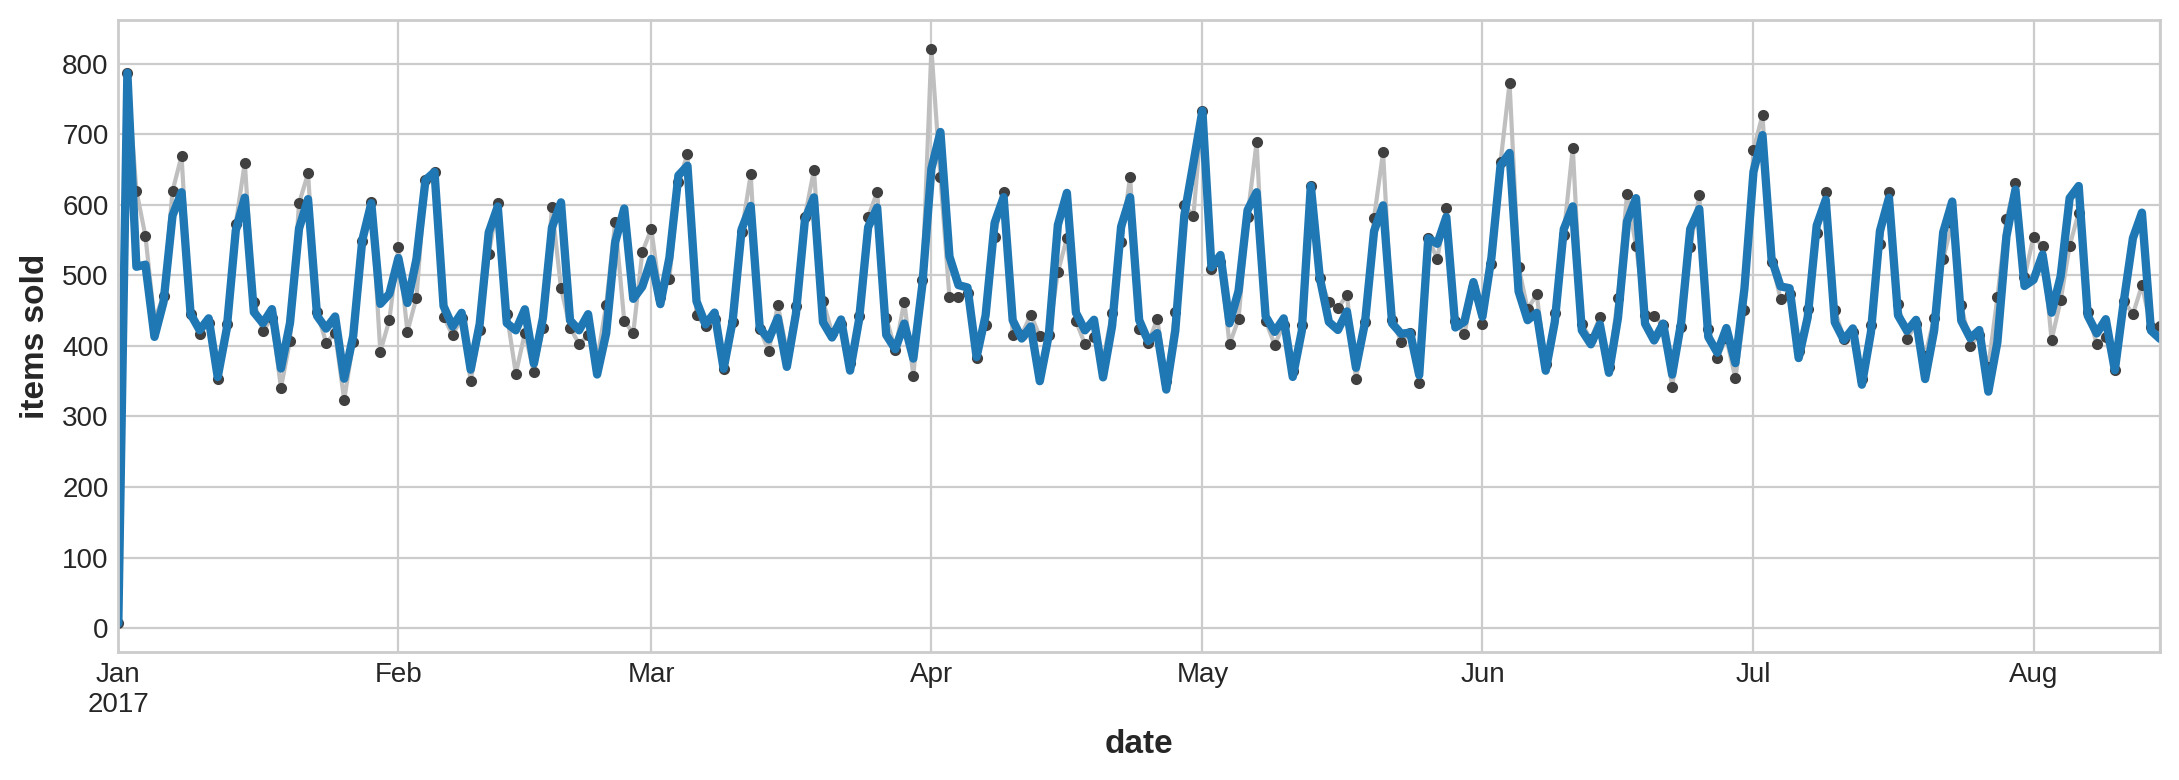

In [56]:
ax = y.plot (**plot_params, ylabel = 'items sold')
ax = y_pred.plot(linewidth=3)

# **Prepare submission with LinearRegression after feature engineering**

## Fitting



> Let's create a seasonal model similar to the one written above for average sales, but for the **full Store Sales dataset** (not averaging) with all ~1800 time series.



In [147]:
# IMPORTANT
y = store_sales.unstack(['store_nbr', 'family']).loc['2017']        # target
y.drop('id', axis = 1, inplace = True)
y.drop('onpromotion', axis = 1, inplace = True)

In [148]:
y.head(3)

sales                                                \
store_nbr           1                                                 
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2017-01-01        0.0       0.0    0.0       0.0   0.0        0.000   
2017-01-02        5.0       0.0    0.0    1434.0   0.0      166.819   
2017-01-03        4.0       0.0    4.0    3081.0   2.0      519.348   

                                                 ...                     \
store_nbr                                        ...         9            
family     CELEBRATION CLEANING   DAIRY    DELI  ... MAGAZINES    MEATS   
date                                             ...                      
2017-01-01         0.0      0.0     0.0    0.00  ...       0.0    0.000   
2017-01-02         0.0    332.0   376.0   44.98  ...       5.0  659.570   
2017-01-03        15.0    952.0  1045.0  209.30  ...       2.0  547.364   

                                                                        \
store_nbr                                                                
family     PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS  POULTRY   
date                                                                     
2017-01-01           0.0          0.0                     0.0    0.000   
2017-01-02        1243.0         11.0                    41.0  843.596   
2017-01-03         876.0          6.0                    15.0  714.660   

                                                                        
store_nbr                                                               
family     PREPARED FOODS   PRODUCE SCHOOL AND OFFICE SUPPLIES SEAFOOD  
date                                                                    
2017-01-01       0.000000     0.000                        0.0     0.0  
2017-01-02     115.188995  3136.896                        1.0    23.0  
2017-01-03     133.039000  3229.558                        1.0    14.0  

[3 rows x 1782 columns]

In [149]:
# recreate same seasonal model
fourier = CalendarFourier(freq='M', order=4)      # 4 sin/cos pairs for "M"onthly seasonality

dp_seasonal = DeterministicProcess(
    index = y.index,
    constant = True,
    order = 1,                      # trend (order 1 means linear)
    seasonal = True,                # weekly seasonality (indicators)
    additional_terms = [fourier],   # annual seasonality (fourier)
    drop = True,
)

X = dp_seasonal.in_sample()       # features
X['NewYear'] = (X.index.dayofyear == 1)

In [150]:
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

y_pred = pd.DataFrame(model.predict(X), index=X.index, columns=y.columns)

In [151]:
y_pred.head(3)

sales                                                      \
store_nbr              1                                                       
family        AUTOMOTIVE BABY CARE        BEAUTY     BEVERAGES         BOOKS   
date                                                                           
2017-01-01  3.197442e-14       0.0  2.575717e-14  6.821210e-13  2.109424e-15   
2017-01-02  4.158065e+00       0.0  3.693728e+00  2.438526e+03  6.524888e-01   
2017-01-03  4.019103e+00       0.0  3.790063e+00  2.556636e+03  9.822520e-01   

                                                                    \
store_nbr                                                            
family      BREAD/BAKERY   CELEBRATION      CLEANING         DAIRY   
date                                                                 
2017-01-01 -4.263256e-13  1.110223e-14  2.728484e-12  2.273737e-12   
2017-01-02  4.339072e+02  1.278250e+01  7.314578e+02  8.363691e+02   
2017-01-03  4.272647e+02  1.496032e+01  8.624653e+02  8.416939e+02   

                          ...                                          \
store_nbr                 ...             9                             
family              DELI  ...     MAGAZINES       MEATS PERSONAL CARE   
date                      ...                                           
2017-01-01  3.836931e-13  ...  3.463896e-14    0.000000  1.591616e-12   
2017-01-02  1.590167e+02  ...  3.372874e+00  520.546845  8.060135e+02   
2017-01-03  1.538898e+02  ...  2.618076e+00  481.457974  7.538661e+02   

                                                                               \
store_nbr                                                                       
family      PET SUPPLIES PLAYERS AND ELECTRONICS       POULTRY PREPARED FOODS   
date                                                                            
2017-01-01  1.776357e-14            3.907985e-14  2.842171e-12   5.400125e-13   
2017-01-02  9.774855e+00            1.951512e+01  5.960566e+02   1.351610e+02   
2017-01-03  8.359401e+00            1.800615e+01  5.495394e+02   1.304207e+02   

                                                                   
store_nbr                                                          
family           PRODUCE SCHOOL AND OFFICE SUPPLIES       SEAFOOD  
date                                                               
2017-01-01  7.275958e-12               7.993606e-15  1.811884e-13  
2017-01-02  2.030560e+03              -6.284309e+00  1.908638e+01  
2017-01-03  2.799504e+03               1.054938e+00  1.826387e+01  

[3 rows x 1782 columns]

In [152]:
y.columns[:3], y_pred.columns[:3]

(MultiIndex([('sales', 1, 'AUTOMOTIVE'),
             ('sales', 1,  'BABY CARE'),
             ('sales', 1,     'BEAUTY')],
            names=[None, 'store_nbr', 'family']),
 MultiIndex([('sales', 1, 'AUTOMOTIVE'),
             ('sales', 1,  'BABY CARE'),
             ('sales', 1,     'BEAUTY')],
            names=[None, 'store_nbr', 'family']))



> If your DataFrame has not sorted the MultiIndex, it's recommended to sort it first for better performance and to avoid some potential errors



In [153]:
y = y.sort_index()
y_pred = y_pred.sort_index()

Text(0.5, 1.0, '2017 Sales of PRODUCE in Store nbr. 1')

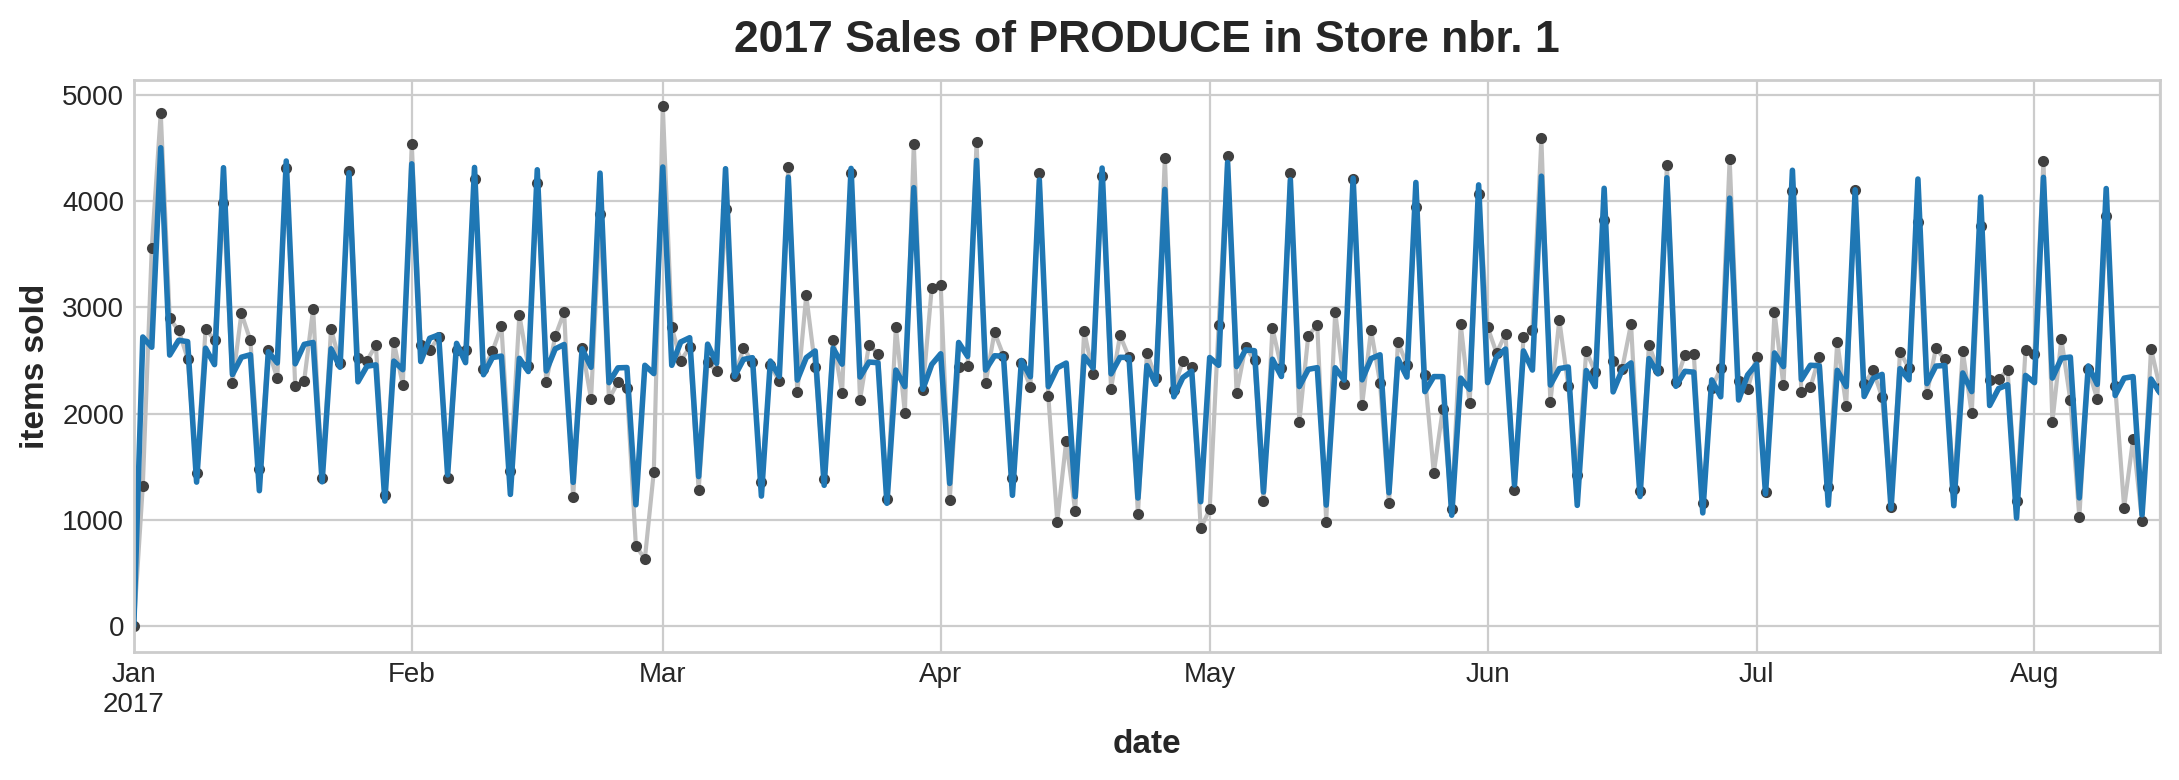

In [154]:
STORE_NBR = 1  # 1 - 54
FAMILY = 'PRODUCE'

y_col = y[('sales', STORE_NBR, FAMILY)]
y_pred_col = y_pred [('sales', STORE_NBR, FAMILY)]

ax = y_col.plot(**plot_params, ylabel = 'items sold')
ax = y_pred_col.plot(linewidth = 2)
ax.set_title(f'2017 Sales of {FAMILY} in Store nbr. {STORE_NBR}')

## Predictions on test data




> Let's create a feature set for the forecast period, and then create the submission file





In [65]:
test_sales = df_test.copy()

test_sales = test_sales.set_index('date').to_period('D')
test_sales = test_sales.set_index(['store_nbr','family'], append=True).sort_index() # sort index

In [66]:
# Create features for test set
X_test = dp_seasonal.out_of_sample(steps=16)
X_test.index.name = 'date'
X_test['NewYear'] = (X_test.index.dayofyear == 1)

In [67]:
y_test = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

y_test = y_test.stack(['store_nbr', 'family'])
y_test = y_test.join(test_sales.id).reindex(columns=['id', 'sales'])


In [81]:
y_test

id        sales
date       store_nbr family                                          
2017-08-16 1         AUTOMOTIVE                  3000888     4.274030
                     BABY CARE                   3000889     0.000000
                     BEAUTY                      3000890     3.495530
                     BEVERAGES                   3000891  2414.541711
                     BOOKS                       3000892     0.438314
...                                                  ...          ...
2017-08-31 54        POULTRY                     3029263    65.218837
                     PREPARED FOODS              3029264    82.835158
                     PRODUCE                     3029265   519.956628
                     SCHOOL AND OFFICE SUPPLIES  3029266     2.078167
                     SEAFOOD                     3029267     3.647829

[28512 rows x 2 columns]

In [69]:
# Write DataFrame to a CSV file without index
file_name='submission.csv'
y_test.to_csv(file_name, index=False)

In [70]:
# download CSV file
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Hybrid model**



> **Residuals** are a measure of the difference between the actual value and the value predicted by a model. In essence, they are what the 1st model (LinearRegression) failed to capture.





In [183]:
y_resid = y - y_pred
y_resid = y_resid.stack().squeeze() # wide to long
y_resid.head(3)

sales                                            \
store_nbr                        1             10            11            12   
date       family                                                               
2017-01-01 AUTOMOTIVE -3.197442e-14 -3.730349e-14  3.197442e-14  3.552714e-15   
           BABY CARE   0.000000e+00 -8.881784e-16 -2.331468e-15 -1.609823e-15   
           BEAUTY     -2.575717e-14 -1.798561e-14 -3.375078e-14 -1.243450e-14   

                                                                               \
store_nbr                        13            14            15            16   
date       family                                                               
2017-01-01 AUTOMOTIVE -4.618528e-14 -3.907985e-14 -4.085621e-14 -3.641532e-14   
           BABY CARE   0.000000e+00  0.000000e+00 -1.398881e-14 -8.326673e-17   
           BEAUTY     -2.042810e-14 -6.383782e-15 -3.597123e-14 -1.154632e-14   

                                                   ...                \
store_nbr                        17            18  ...            5    
date       family                                  ...                 
2017-01-01 AUTOMOTIVE  1.776357e-15 -3.907985e-14  ... -3.463896e-14   
           BABY CARE  -4.107825e-15 -2.775558e-15  ... -4.662937e-15   
           BEAUTY     -4.529710e-14 -6.217249e-14  ... -3.375078e-14   

                                                                               \
store_nbr                        50            51            52            53   
date       family                                                               
2017-01-01 AUTOMOTIVE -5.329071e-14  3.552714e-15 -2.353673e-14 -3.907985e-14   
           BABY CARE   0.000000e+00  0.000000e+00  0.000000e+00  2.220446e-16   
           BEAUTY     -5.684342e-14 -8.881784e-15 -3.880229e-14 -2.842171e-14   

                                                                               \
store_nbr                        54            6             7             8    
date       family                                                               
2017-01-01 AUTOMOTIVE -1.065814e-14 -3.552714e-14 -2.486900e-14 -8.881784e-15   
           BABY CARE   4.857226e-17  1.387779e-16 -1.332268e-15 -4.107825e-15   
           BEAUTY     -1.421085e-14 -2.842171e-14 -6.039613e-14 -4.263256e-14   

                                     
store_nbr                        9   
date       family                    
2017-01-01 AUTOMOTIVE -5.506706e-14  
           BABY CARE  -5.551115e-15  
           BEAUTY      8.881784e-15  

[3 rows x 54 columns]



> We'll usually want to use different feature sets (`X_train_1` and `X_train_2` above) depending on what we want each model to learn. If we use the first model to learn the trend, we generally wouldn't need a trend feature for the second model, for example.




## Create features for fitting the second model.



In [184]:
family_sales = (
    store_sales
    .groupby(['family', 'date'])
    .mean()
    .unstack('family')
    .loc['2017']
)

In [185]:
# X_2: Features for XGBoost
X_2 = family_sales.drop('sales', axis=1).stack()  # onpromotion feature
X_2

id  onpromotion
date       family                                            
2017-01-01 AUTOMOTIVE                  2597248.5     0.000000
           BABY CARE                   2597249.5     0.000000
           BEAUTY                      2597250.5     0.000000
           BEVERAGES                   2597251.5     0.703704
           BOOKS                       2597252.5     0.000000
...                                          ...          ...
2017-08-15 POULTRY                     3000008.5     0.111111
           PREPARED FOODS              3000009.5     0.166667
           PRODUCE                     3000010.5    58.685185
           SCHOOL AND OFFICE SUPPLIES  3000011.5     2.740741
           SEAFOOD                     3000012.5     0.000000

[7491 rows x 2 columns]

In [186]:
# Label encoding for 'family'
le = LabelEncoder()  # from sklearn.preprocessing
X_2 = X_2.reset_index('family')
X_2['family'] = le.fit_transform(X_2['family'])
X_2

family         id  onpromotion
date                                      
2017-01-01       0  2597248.5     0.000000
2017-01-01       1  2597249.5     0.000000
2017-01-01       2  2597250.5     0.000000
2017-01-01       3  2597251.5     0.703704
2017-01-01       4  2597252.5     0.000000
...            ...        ...          ...
2017-08-15      28  3000008.5     0.111111
2017-08-15      29  3000009.5     0.166667
2017-08-15      30  3000010.5    58.685185
2017-08-15      31  3000011.5     2.740741
2017-08-15      32  3000012.5     0.000000

[7491 rows x 3 columns]

In [187]:
# Label encoding for seasonality
X_2["day"] = X_2.index.day  # values are day of the month
X_2

family         id  onpromotion  day
date                                           
2017-01-01       0  2597248.5     0.000000    1
2017-01-01       1  2597249.5     0.000000    1
2017-01-01       2  2597250.5     0.000000    1
2017-01-01       3  2597251.5     0.703704    1
2017-01-01       4  2597252.5     0.000000    1
...            ...        ...          ...  ...
2017-08-15      28  3000008.5     0.111111   15
2017-08-15      29  3000009.5     0.166667   15
2017-08-15      30  3000010.5    58.685185   15
2017-08-15      31  3000011.5     2.740741   15
2017-08-15      32  3000012.5     0.000000   15

[7491 rows x 4 columns]

## Fitting second model

In [194]:
model_2 = XGBRegressor()

model_2.fit(X_2, y_resid)

y_pred_2 = pd.DataFrame(
    model_2.predict(X_2),
    index = y_resid.index,
    columns = y_resid.columns,
)

In [189]:
y_pred.shape

(227, 1782)

In [190]:
y_pred_reshape = y_pred.stack().squeeze()  # wide to long
y_pred_reshape.shape

(7491, 54)

In [191]:
y_pred_reshape

sales                \
store_nbr                                        1             10   
date       family                                                   
2017-01-01 AUTOMOTIVE                  3.197442e-14  3.730349e-14   
           BABY CARE                   0.000000e+00  8.881784e-16   
           BEAUTY                      2.575717e-14  1.798561e-14   
           BEVERAGES                   6.821210e-13  5.911716e-12   
           BOOKS                       2.109424e-15  0.000000e+00   
...                                             ...           ...   
2017-08-15 POULTRY                     2.994730e+02  1.205554e+02   
           PREPARED FOODS              5.259142e+01  1.810730e+01   
           PRODUCE                     2.194684e+03  3.065600e+02   
           SCHOOL AND OFFICE SUPPLIES  9.225297e-02  1.911793e+00   
           SEAFOOD                     2.620399e+01  1.835771e+00   

                                                                   \
store_nbr                                        11            12   
date       family                                                   
2017-01-01 AUTOMOTIVE                 -3.197442e-14 -3.552714e-15   
           BABY CARE                   2.331468e-15  1.609823e-15   
           BEAUTY                      3.375078e-14  1.243450e-14   
           BEVERAGES                   2.273737e-11  1.318767e-11   
           BOOKS                       0.000000e+00  0.000000e+00   
...                                             ...           ...   
2017-08-15 POULTRY                     4.020587e+02  1.392892e+02   
           PREPARED FOODS              1.015876e+02  3.110652e+01   
           PRODUCE                     2.055937e+03  4.399344e+02   
           SCHOOL AND OFFICE SUPPLIES  8.900026e+00  1.727489e+00   
           SEAFOOD                     7.273676e+00  4.891694e+00   

                                                                   \
store_nbr                                        13            14   
date       family                                                   
2017-01-01 AUTOMOTIVE                  4.618528e-14  3.907985e-14   
           BABY CARE                   0.000000e+00  0.000000e+00   
           BEAUTY                      2.042810e-14  6.383782e-15   
           BEVERAGES                   7.048584e-12  3.865352e-12   
           BOOKS                       0.000000e+00  0.000000e+00   
...                                             ...           ...   
2017-08-15 POULTRY                     8.569183e+01  6.227607e+01   
           PREPARED FOODS              1.643106e+01  9.592225e+01   
           PRODUCE                     2.479884e+02  4.826776e+02   
           SCHOOL AND OFFICE SUPPLIES  2.344885e+00  1.264321e+00   
           SEAFOOD                     2.990186e+00  4.474788e+00   

                                                                   \
store_nbr                                        15            16   
date       family                                                   
2017-01-01 AUTOMOTIVE                  4.085621e-14  3.641532e-14   
           BABY CARE                   1.398881e-14  8.326673e-17   
           BEAUTY                      3.597123e-14  1.154632e-14   
           BEVERAGES                   7.730705e-12  1.364242e-12   
           BOOKS                       0.000000e+00  0.000000e+00   
...                                             ...           ...   
2017-08-15 POULTRY                     1.187854e+02  6.240919e+01   
           PREPARED FOODS              5.217292e+01  3.196749e+01   
           PRODUCE                     1.043768e+03  8.534554e+02   
           SCHOOL AND OFFICE SUPPLIES  1.677531e+00  8.032432e-01   
           SEAFOOD                     5.120936e+00  1.575344e+00   

                                                                   ...  \
store_nbr                                        17            18  ...   
date       family             

In [195]:
y_pred_2

sales                         \
store_nbr                                     1          10          11   
date       family                                                         
2017-01-01 AUTOMOTIVE                  -0.577163  -0.718029   -5.107609   
           BABY CARE                   -0.577163  -0.718029   -5.107609   
           BEAUTY                      -0.577163  -0.718029   -5.107609   
           BEVERAGES                   -6.527143   1.462638    3.293769   
           BOOKS                       -0.268167  -1.000029   -1.988830   
...                                          ...        ...         ...   
2017-08-15 POULTRY                    -39.371929  -1.684122  103.685585   
           PREPARED FOODS              -5.294122  10.071830   41.274117   
           PRODUCE                     45.449120 -35.981544  269.576263   
           SCHOOL AND OFFICE SUPPLIES  -0.499945  12.301903   28.376490   
           SEAFOOD                     -5.422112   5.466195   16.715792   

                                                                        \
store_nbr                                     12         13         14   
date       family                                                        
2017-01-01 AUTOMOTIVE                   0.665710  -0.026589   0.007053   
           BABY CARE                    1.086693  -0.026589   0.007053   
           BEAUTY                       1.086693  -0.026589   0.007053   
           BEVERAGES                    1.671787   0.356057  10.805052   
           BOOKS                        0.788074  -1.103418   1.596094   
...                                          ...        ...        ...   
2017-08-15 POULTRY                     15.378036  -7.508735  -4.746364   
           PREPARED FOODS              17.225624   0.460688   2.794686   
           PRODUCE                    -46.103752  64.931236  91.671494   
           SCHOOL AND OFFICE SUPPLIES  11.305717   0.932878   1.029992   
           SEAFOOD                     -2.691339   0.124616  -1.379966   

                                                                        \
store_nbr                                    15         16          17   
date       family                                                        
2017-01-01 AUTOMOTIVE                 -2.002097   0.070386   -1.672723   
           BABY CARE                  -2.002097   0.070386   -1.672723   
           BEAUTY                     -2.002097   0.070386   -1.672723   
           BEVERAGES                  -0.601494  -0.282645   21.624956   
           BOOKS                      -2.002097   1.416739   -0.427738   
...                                         ...        ...         ...   
2017-08-15 POULTRY                     5.788824   2.877968  -13.827240   
           PREPARED FOODS              5.883957   6.767639   18.653666   
           PRODUCE                     4.052050  68.394905  185.992004   
           SCHOOL AND OFFICE SUPPLIES  2.323357   1.172776   41.531120   
           SEAFOOD                     0.402828   1.315669   -4.002311   

                                                   ...                         \
store_nbr                                      18  ...         5           50   
date       family                                  ...                          
2017-01-01 AUTOMOTIVE                   -1.803440  ...   0.191038   -6.149612   
           BABY CARE                    -1.803440  ...   0.191038   -6.149612   
           BEAUTY                       -1.803440  ...   0.191038   -9.735775   
           BEVERAGES                    -0.938467  ...   0.620839   -1.610862   
           BOOKS                        -1.769611  ...   1.123693   -3.927848   
...                                           ...  ...        ...         ...   
2017-08-15 POULTRY                     -19.930300  ...  11.824100   19.204874   
           PREPARED FOODS               -1.747488  ...   7.577963   24.823675   
           PRODUCE         

In [198]:
y_final = y_pred_reshape + y_pred_2
y_final.head(3)

sales                                          \
store_nbr                    1         10        11        12        13   
date       family                                                         
2017-01-01 AUTOMOTIVE -0.577163 -0.718029 -5.107609  0.665710 -0.026589   
           BABY CARE  -0.577163 -0.718029 -5.107609  1.086693 -0.026589   
           BEAUTY     -0.577163 -0.718029 -5.107609  1.086693 -0.026589   

                                                                        ...  \
store_nbr                    14        15        16        17       18  ...   
date       family                                                       ...   
2017-01-01 AUTOMOTIVE  0.007053 -2.002097  0.070386 -1.672723 -1.80344  ...   
           BABY CARE   0.007053 -2.002097  0.070386 -1.672723 -1.80344  ...   
           BEAUTY      0.007053 -2.002097  0.070386 -1.672723 -1.80344  ...   

                                                                         \
store_nbr                    5         50        51        52        53   
date       family                                                         
2017-01-01 AUTOMOTIVE  0.191038 -6.149612  1.599127 -4.461683  1.658265   
           BABY CARE   0.191038 -6.149612  1.599127 -4.461683 -0.715122   
           BEAUTY      0.191038 -9.735775  1.599127 -4.185887 -0.917520   

                                                                         
store_nbr                    54        6         7         8         9   
date       family                                                        
2017-01-01 AUTOMOTIVE  4.243606 -4.377195 -3.538188 -8.796124  2.432302  
           BABY CARE   4.243606 -4.377195 -3.538188 -8.796124  2.432302  
           BEAUTY      4.243606 -4.377195 -3.538188 -8.796124  2.432302  

[3 rows x 54 columns]

## Same result by defining a Class

In [177]:
class BoostedHybrid:
    def __init__(self, model_1, model_2):
        self.model_1 = model_1
        self.model_2 = model_2
        self.y_columns = None  # store column names from fit method

In [178]:
def fit(self, X_1, X_2, y):
    # YOUR CODE HERE: fit self.model_1
    self.model_1.fit(X_1, y)

    y_fit = pd.DataFrame(
        # YOUR CODE HERE: make predictions with self.model_1
        self.model_1.predict(X_1),
        index=X_1.index, columns=y.columns,
    )

    # YOUR CODE HERE: compute residuals
    y_resid = y - y_fit
    y_resid = y_resid.stack().squeeze() # wide to long

    # YOUR CODE HERE: fit self.model_2 on residuals
    self.model_2.fit(X_2, y_resid)

    # Save column names for predict method
    self.y_columns = y.columns
    # Save data for question checking
    self.y_fit = y_fit
    self.y_resid = y_resid


# Add method to class
BoostedHybrid.fit = fit

In [179]:
def predict(self, X_1, X_2):
    y_pred = pd.DataFrame(
        # YOUR CODE HERE: predict with self.model_1
        self.model_1.predict(X_1),
        index=X_1.index, columns=self.y_columns,
    )
    y_pred = y_pred.stack().squeeze()  # wide to long

    # YOUR CODE HERE: add self.model_2 predictions to y_pred
    y_pred += self.model_2.predict(X_2)

    return y_pred.unstack()  # long to wide


# Add method to class
BoostedHybrid.predict = predict

In [180]:
hybrid_model = BoostedHybrid(
    model_1=LinearRegression(),
    model_2=XGBRegressor(),
)

# YOUR CODE HERE: Fit and predict
hybrid_model.fit(X, X_2, y)
y_hybrid = hybrid_model.predict(X, X_2)

y_hybrid = y_hybrid.clip(0.0)

In [182]:
y_hybrid.tail(3)

sales                                                          \
store_nbr           1                                                           
family     AUTOMOTIVE BABY CARE    BEAUTY    BEVERAGES     BOOKS BREAD/BAKERY   
date                                                                            
2017-08-13   0.278293       0.0  0.000000   802.800305  0.000000   145.647411   
2017-08-14   3.663877       0.0  1.459317  2120.875700  0.000000   344.965181   
2017-08-15   3.886690       0.0  2.137416  1975.016065  0.243721   313.205772   

                                                            ...             \
store_nbr                                                   ...          9   
family     CELEBRATION    CLEANING       DAIRY        DELI  ...  MAGAZINES   
date                                                        ...              
2017-08-13    0.000000  164.094911  293.063245   49.150471  ...   0.000000   
2017-08-14   13.536095  574.172882  736.956708  143.598681  ...   1.975074   
2017-08-15   16.566649  698.927709  607.688100  123.442651  ...  11.831172   

                                                                           \
store_nbr                                                                   
family           MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS   
date                                                                        
2017-08-13  357.243624    476.490900     0.000000                0.000000   
2017-08-14  315.751228    424.410447     0.000000                0.764418   
2017-08-15  421.030461    519.907833    19.334215               17.401793   

                                                                               \
store_nbr                                                                       
family         POULTRY PREPARED FOODS      PRODUCE SCHOOL AND OFFICE SUPPLIES   
date                                                                            
2017-08-13  487.226389      97.932743  1768.835971                 156.548307   
2017-08-14  316.871256     103.028244  1340.939285                 170.864903   
2017-08-15  399.044312     150.303568  2419.467959                 135.257317   

                       
store_nbr              
family        SEAFOOD  
date                   
2017-08-13  16.116289  
2017-08-14  13.351641  
2017-08-15  21.585165  

[3 rows x 1782 columns]